In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from utils import plot_clusters, plot
import numpy as np
import os
from pandas.api.types import is_string_dtype
import matplotlib.pyplot as plt

### Загружаем данные

Загружаем данные

In [2]:
data_filenames = [name for name in os.listdir("./input_data") if name.startswith("ЦУР")]
data_filenames

['ЦУР1.csv',
 'ЦУР10.csv',
 'ЦУР11.csv',
 'ЦУР12.csv',
 'ЦУР13.csv',
 'ЦУР14.csv',
 'ЦУР15.csv',
 'ЦУР16.csv',
 'ЦУР17.csv',
 'ЦУР2.csv',
 'ЦУР3.csv',
 'ЦУР4.csv',
 'ЦУР5.csv',
 'ЦУР6.csv',
 'ЦУР7.csv',
 'ЦУР8.csv',
 'ЦУР9.csv']

In [3]:
dfs = [pd.read_csv(os.path.join("./input_data", filename), decimal=',') for filename in data_filenames]

### Удаляем 2023 2024 колонки

In [4]:
dfs = [df.drop("2023", axis=1) for df in dfs if "2023" in df.columns]
dfs = [df.drop("2024", axis=1) for df in dfs if "2024" in df.columns]

### Одинаковые название колонок

In [5]:
for df in dfs:
    df.columns = dfs[0].columns
    print(df.columns)

Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022

### Склеиваем в один df

In [6]:
df_ro = pd.concat(dfs)

In [7]:
df_ro

ЦУР  \
0                                                1.2.2   
1                                                1.2.2   
2                                                1.2.2   
3                                                1.3.1   
4                                                1.3.1   
..                                                 ...   
98   9.b.1 (Доля продукции высокотехнологичных и на...   
99   9.b.1 (Доля продукции высокотехнологичных и на...   
100  9.b.1 (Доля продукции высокотехнологичных и на...   
101  Т 9.9 (Расходы на научно-исследовательские и о...   
102  Т 9.9 (Внутренние затраты на исследования и ра...   

                     Субъект РФ      2016      2017      2018      2019  \
0                            РФ      13.2      12.9      12.6      12.3   
1                           ЮФО       NaN       NaN       NaN       NaN   
2                            РО      14.2      13.9      13.2      13.3   
3                            РФ  230710.0  299752.0  308815.0  326293.0   
4    Республика Адыгея (Адыгея)     139.0     112.0     118.0     128.0   
..                          ...       ...       ...       ...       ...   
98                           РФ      21,3      21,8      21,3      22,2   
99                          ЮФО      15,6      15,6      16,1      16,2   
100                          РО        19      20,3      19,9      18,3   
101                          РФ       1,1      1,11         1      1,04   
102                          РО      0,99      0,91      0,84      0,98   

         2020      2021    2022  
0        12.1      11.0     9,8  
1         NaN       NaN     NaN  
2        13.0      12.0    10,5  
3    604856.0  980845.0  909426  
4       143.0       NaN    2715  
..        ...       ...     ...  
98         25      23,4    22.2  
99         17      16,2     NaN  
100      19,1      18,6     NaN  
101       1,1         1     NaN  
102      0,86      0,71     NaN  

[1034 rows x 9 columns]

In [8]:
df_ro.set_index("ЦУР", inplace=True)

### Достаем только РО

In [9]:
df_ro = df_ro[df_ro["Субъект РФ"] == "РО"]

In [10]:
df_ro

Субъект РФ    2016  \
ЦУР                                                                     
1.2.2                                                      РО    14.2   
1.3.1                                                      РО  2241.0   
1.4.1                                                      РО    61.2   
1.4.2                                                      РО  6227.1   
1.5.1 Пострадавшие                                         РО   135.0   
...                                                       ...     ...   
9.а.1 (Обязательства в млн дол США)                        РО   -24,2   
9.а.2 (Изьято в млн дол США)                               РО  215,59   
9.а.3 (Поступило в млн дол США)                            РО  191,39   
9.b.1 (Доля продукции высокотехнологичных и нау...         РО      19   
Т 9.9 (Внутренние затраты на исследования и раз...         РО    0,99   

                                                       2017    2018    2019  \
ЦУР                                                                           
1.2.2                                                  13.9    13.2    13.3   
1.3.1                                                2029.0  4905.0  8689.0   
1.4.1                                                  63.0    64.3    67.5   
1.4.2                                                6233.7  6246.6  6255.6   
1.5.1 Пострадавшие                                    648.0    50.0    61.0   
...                                                     ...     ...     ...   
9.а.1 (Обязательства в млн дол США)                 -277,67  181,02  -92,19   
9.а.2 (Изьято в млн дол США)                         476,03  396,68  617,75   
9.а.3 (Поступило в млн дол США)                      198,36  577,69  525,56   
9.b.1 (Доля продукции высокотехнологичных и нау...     20,3    19,9    18,3   
Т 9.9 (Внутренние затраты на исследования и раз...     0,91    0,84    0,98   

                                                      2020    2021    2022  
ЦУР                                                                         
1.2.2                                                 13.0    12.0    10,5  
1.3.1                                               6921.0     NaN   23687  
1.4.1                                                66.97   68.74   73,74  
1.4.2                                               6241.6  6245.7  6271,7  
1.5.1 Пострадавшие                                   281.0   235.0     NaN  
...                                                    ...     ...     ...  
9.а.1 (Обязательства в млн дол США)                  91,64  -79,31     NaN  
9.а.2 (Изьято в млн дол США)                        418,45   614,3     NaN  
9.а.3 (Поступило в млн дол США)                     510,09  534,99     NaN  
9.b.1 (Доля продукции высокотехнологичных и нау...    19,1    18,6     NaN  
Т 9.9 (Внутренние затраты на исследования и раз...    0,86    0,71     NaN  

[301 rows x 8 columns]

In [11]:
df_ro.drop("Субъект РФ", axis=1, inplace=True)

C:\Users\yxtag\AppData\Local\Temp\ipykernel_32060\3480877717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ro.drop("Субъект РФ", axis=1, inplace=True)


### Приведение типов

Приводим данные к числовому типу, чтобы дальше с ними работать

In [12]:
df_ro["2016"].astype(str).str.replace(",", ".", regex=True)

ЦУР
1.2.2                                                                                                   14.2
1.3.1                                                                                                 2241.0
1.4.1                                                                                                   61.2
1.4.2                                                                                                 6227.1
1.5.1 Пострадавшие                                                                                     135.0
                                                                                                       ...  
9.а.1 (Обязательства в млн дол США)                                                                    -24.2
9.а.2 (Изьято в млн дол США)                                                                          215.59
9.а.3 (Поступило в млн дол США)                                                                       191.39
9.b.1 (Доля про

In [13]:
df_ro1 = pd.DataFrame(index=df_ro.index)

In [14]:
numeric_columns = df_ro.columns[:]
for num_col in numeric_columns:
    df_ro1[num_col] = df_ro[num_col].astype(str).str.replace(",", ".")
    df_ro1[num_col] = df_ro1[num_col].astype(str).str.replace(" ", "")
    df_ro1[num_col] = df_ro1[num_col].astype(str).str.replace("…", "")
    df_ro1[num_col] = df_ro1[num_col].astype(str).str.replace("...", "") 
    df_ro1[num_col] = df_ro1[num_col].astype(str).str.replace("–", "") 
    df_ro1[num_col] = df_ro1[num_col].astype(str).str.replace("-", "")

In [15]:
df_ro1 = df_ro1.replace("nan", np.NAN)
df_ro = df_ro1.apply(pd.to_numeric)
del df_ro1

In [16]:
df_ro

2016     2017     2018  \
ЦУР                                                                             
1.2.2                                                 14.20    13.90    13.20   
1.3.1                                               2241.00  2029.00  4905.00   
1.4.1                                                 61.20    63.00    64.30   
1.4.2                                               6227.10  6233.70  6246.60   
1.5.1 Пострадавшие                                   135.00   648.00    50.00   
...                                                     ...      ...      ...   
9.а.1 (Обязательства в млн дол США)                   24.20   277.67   181.02   
9.а.2 (Изьято в млн дол США)                         215.59   476.03   396.68   
9.а.3 (Поступило в млн дол США)                      191.39   198.36   577.69   
9.b.1 (Доля продукции высокотехнологичных и нау...    19.00    20.30    19.90   
Т 9.9 (Внутренние затраты на исследования и раз...     0.99     0.91     0.84   

                                                       2019     2020     2021  \
ЦУР                                                                             
1.2.2                                                 13.30    13.00    12.00   
1.3.1                                               8689.00  6921.00      NaN   
1.4.1                                                 67.50    66.97    68.74   
1.4.2                                               6255.60  6241.60  6245.70   
1.5.1 Пострадавшие                                    61.00   281.00   235.00   
...                                                     ...      ...      ...   
9.а.1 (Обязательства в млн дол США)                   92.19    91.64    79.31   
9.а.2 (Изьято в млн дол США)                         617.75   418.45   614.30   
9.а.3 (Поступило в млн дол США)                      525.56   510.09   534.99   
9.b.1 (Доля продукции высокотехнологичных и нау...    18.30    19.10    18.60   
Т 9.9 (Внутренние затраты на исследования и раз...     0.98     0.86     0.71   

                                                        2022  
ЦУР                                                           
1.2.2                                                  10.50  
1.3.1                                               23687.00  
1.4.1                                                  73.74  
1.4.2                                                6271.70  
1.5.1 Пострадавшие                                       NaN  
...                                                      ...  
9.а.1 (Обязательства в млн дол США)                      NaN  
9.а.2 (Изьято в млн дол США)                             NaN  
9.а.3 (Поступило в млн дол США)                          NaN  
9.b.1 (Доля продукции высокотехнологичных и нау...       NaN  
Т 9.9 (Внутренние затраты на исследования и раз...       NaN  

[301 rows x 7 columns]

In [17]:
df_ro.dtypes

2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
dtype: object

### Работа с пропусками

In [18]:
nan_rows = df_ro[df_ro.isna().any(axis=1)]

In [19]:
nan_rows

2016        2017  \
ЦУР                                                                        
1.3.1                                                2241.00     2029.00   
1.5.1 Пострадавшие                                    135.00      648.00   
1.5.1 Погибшие                                         77.00       12.00   
1.5.2                                               61340.00  3819811.80   
10.1.1 (в расчете на одно домохозяйство)       ...       NaN    12995.00   
...                                                      ...         ...   
9.а.1 (Обязательства в млн дол США)                    24.20      277.67   
9.а.2 (Изьято в млн дол США)                          215.59      476.03   
9.а.3 (Поступило в млн дол США)                       191.39      198.36   
9.b.1 (Доля продукции высокотехнологичных и нау...     19.00       20.30   
Т 9.9 (Внутренние затраты на исследования и раз...      0.99        0.91   

                                                        2018      2019  \
ЦУР                                                                      
1.3.1                                                4905.00   8689.00   
1.5.1 Пострадавшие                                     50.00     61.00   
1.5.1 Погибшие                                         21.00     20.00   
1.5.2                                                    NaN  51276.00   
10.1.1 (в расчете на одно домохозяйство)       ...  10587.80  12020.50   
...                                                      ...       ...   
9.а.1 (Обязательства в млн дол США)                   181.02     92.19   
9.а.2 (Изьято в млн дол США)                          396.68    617.75   
9.а.3 (Поступило в млн дол США)                       577.69    525.56   
9.b.1 (Доля продукции высокотехнологичных и нау...     19.90     18.30   
Т 9.9 (Внутренние затраты на исследования и раз...      0.84      0.98   

                                                         2020      2021  \
ЦУР                                                                       
1.3.1                                                 6921.00       NaN   
1.5.1 Пострадавшие                                     281.00    235.00   
1.5.1 Погибшие                                          15.00     30.00   
1.5.2                                               451548.00  16227.00   
10.1.1 (в расчете на одно домохозяйство)       ...   14130.80  11758.10   
...                                                       ...       ...   
9.а.1 (Обязательства в млн дол США)                     91.64     79.31   
9.а.2 (Изьято в млн дол США)                           418.45    614.30   
9.а.3 (Поступило в млн дол США)                        510.09    534.99   
9.b.1 (Доля продукции высокотехнологичных и нау...      19.10     18.60   
Т 9.9 (Внутренние затраты на исследования и раз...       0.86      0.71   

                                                        2022  
ЦУР                                                           
1.3.1                                               23687.00  
1.5.1 Пострадавшие                                       NaN  
1.5.1 Погибшие                                           NaN  
1.5.2                                                4027.89  
10.1.1 (в расчете на одно домохозяйство)       ...       NaN  
...                                                      ...  
9.а.1 (Обязательства в млн дол США)                      NaN  
9.а.2 (Изьято в млн дол США)                             NaN  
9.а.3 (Поступило в млн дол США)                          NaN  
9.b.1 (Доля продукции высокотехнологичных и нау...       NaN  
Т 9.9 (Внутренние затраты на исследования и раз...       NaN  

[175 rows x 7 columns]

Удаляем показатель если в нем больше половины пропусков, т. к. в таком случае даже если мы заполним пропуски, результат заполнения скорее всего не будет иметь много общего с реальностью

In [20]:
df_ro = df_ro.dropna(thresh=int(len(numeric_columns) / 2 + 1))

In [21]:
df_ro

2016     2017     2018  \
ЦУР                                                                             
1.2.2                                                 14.20    13.90    13.20   
1.3.1                                               2241.00  2029.00  4905.00   
1.4.1                                                 61.20    63.00    64.30   
1.4.2                                               6227.10  6233.70  6246.60   
1.5.1 Пострадавшие                                   135.00   648.00    50.00   
...                                                     ...      ...      ...   
9.а.1 (Обязательства в млн дол США)                   24.20   277.67   181.02   
9.а.2 (Изьято в млн дол США)                         215.59   476.03   396.68   
9.а.3 (Поступило в млн дол США)                      191.39   198.36   577.69   
9.b.1 (Доля продукции высокотехнологичных и нау...    19.00    20.30    19.90   
Т 9.9 (Внутренние затраты на исследования и раз...     0.99     0.91     0.84   

                                                       2019     2020     2021  \
ЦУР                                                                             
1.2.2                                                 13.30    13.00    12.00   
1.3.1                                               8689.00  6921.00      NaN   
1.4.1                                                 67.50    66.97    68.74   
1.4.2                                               6255.60  6241.60  6245.70   
1.5.1 Пострадавшие                                    61.00   281.00   235.00   
...                                                     ...      ...      ...   
9.а.1 (Обязательства в млн дол США)                   92.19    91.64    79.31   
9.а.2 (Изьято в млн дол США)                         617.75   418.45   614.30   
9.а.3 (Поступило в млн дол США)                      525.56   510.09   534.99   
9.b.1 (Доля продукции высокотехнологичных и нау...    18.30    19.10    18.60   
Т 9.9 (Внутренние затраты на исследования и раз...     0.98     0.86     0.71   

                                                        2022  
ЦУР                                                           
1.2.2                                                  10.50  
1.3.1                                               23687.00  
1.4.1                                                  73.74  
1.4.2                                                6271.70  
1.5.1 Пострадавшие                                       NaN  
...                                                      ...  
9.а.1 (Обязательства в млн дол США)                      NaN  
9.а.2 (Изьято в млн дол США)                             NaN  
9.а.3 (Поступило в млн дол США)                          NaN  
9.b.1 (Доля продукции высокотехнологичных и нау...       NaN  
Т 9.9 (Внутренние затраты на исследования и раз...       NaN  

[262 rows x 7 columns]

Заполним пропуски с помощью линейной интерполяции

In [22]:
df_ro[df_ro.isna().any(axis=1)] = df_ro[df_ro.isna().any(axis=1)].T.interpolate(method="linear", limit_direction='both').T

C:\Users\yxtag\AppData\Local\Temp\ipykernel_32060\3599901758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ro[df_ro.isna().any(axis=1)] = df_ro[df_ro.isna().any(axis=1)].T.interpolate(method="linear", limit_direction='both').T
C:\Users\yxtag\AppData\Local\Temp\ipykernel_32060\3599901758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ro[df_ro.isna().any(axis=1)] = df_ro[df_ro.isna().any(axis=1)].T.interpolate(method="linear", limit_direction='both').T


In [23]:
df_ro

2016     2017     2018  \
ЦУР                                                                             
1.2.2                                                 14.20    13.90    13.20   
1.3.1                                               2241.00  2029.00  4905.00   
1.4.1                                                 61.20    63.00    64.30   
1.4.2                                               6227.10  6233.70  6246.60   
1.5.1 Пострадавшие                                   135.00   648.00    50.00   
...                                                     ...      ...      ...   
9.а.1 (Обязательства в млн дол США)                   24.20   277.67   181.02   
9.а.2 (Изьято в млн дол США)                         215.59   476.03   396.68   
9.а.3 (Поступило в млн дол США)                      191.39   198.36   577.69   
9.b.1 (Доля продукции высокотехнологичных и нау...    19.00    20.30    19.90   
Т 9.9 (Внутренние затраты на исследования и раз...     0.99     0.91     0.84   

                                                       2019     2020  \
ЦУР                                                                    
1.2.2                                                 13.30    13.00   
1.3.1                                               8689.00  6921.00   
1.4.1                                                 67.50    66.97   
1.4.2                                               6255.60  6241.60   
1.5.1 Пострадавшие                                    61.00   281.00   
...                                                     ...      ...   
9.а.1 (Обязательства в млн дол США)                   92.19    91.64   
9.а.2 (Изьято в млн дол США)                         617.75   418.45   
9.а.3 (Поступило в млн дол США)                      525.56   510.09   
9.b.1 (Доля продукции высокотехнологичных и нау...    18.30    19.10   
Т 9.9 (Внутренние затраты на исследования и раз...     0.98     0.86   

                                                        2021      2022  
ЦУР                                                                     
1.2.2                                                  12.00     10.50  
1.3.1                                               15304.00  23687.00  
1.4.1                                                  68.74     73.74  
1.4.2                                                6245.70   6271.70  
1.5.1 Пострадавшие                                    235.00    235.00  
...                                                      ...       ...  
9.а.1 (Обязательства в млн дол США)                    79.31     79.31  
9.а.2 (Изьято в млн дол США)                          614.30    614.30  
9.а.3 (Поступило в млн дол США)                       534.99    534.99  
9.b.1 (Доля продукции высокотехнологичных и нау...     18.60     18.60  
Т 9.9 (Внутренние затраты на исследования и раз...      0.71      0.71  

[262 rows x 7 columns]

### Нормализация

Нормализуем данные с помощью вычитания среднего и деления на дисперсию

In [24]:
scaler = StandardScaler()

In [25]:
scaled_rows = []
for i in range(df_ro.shape[0]):
    row = df_ro.iloc[i]
    scaled_row = scaler.fit_transform(row.values.reshape(-1, 1))
    scaled_rows.append([el[0] for el in scaled_row.tolist()])

# Convert the scaled rows back to a DataFrame
scaled_df_ro = pd.DataFrame(scaled_rows, columns=df_ro.columns)

In [26]:
scaled_df_ro.set_index(df_ro.index, inplace=True)

In [27]:
scaled_df_ro

2016      2017  \
ЦУР                                                                      
1.2.2                                               1.139583  0.882258   
1.3.1                                              -0.943865 -0.972992   
1.4.1                                              -1.374250 -0.906894   
1.4.2                                              -1.397150 -0.909256   
1.5.1 Пострадавшие                                 -0.532154  2.197795   
...                                                      ...       ...   
9.а.1 (Обязательства в млн дол США)                -1.200915  2.047509   
9.а.2 (Изьято в млн дол США)                       -1.891971 -0.021434   
9.а.3 (Поступило в млн дол США)                    -1.591631 -1.546830   
9.b.1 (Доля продукции высокотехнологичных и нау... -0.168281  1.745918   
Т 9.9 (Внутренние затраты на исследования и раз...  1.249476  0.497104   

                                                        2018      2019  \
ЦУР                                                                      
1.2.2                                               0.281832  0.367607   
1.3.1                                              -0.577852 -0.057960   
1.4.1                                              -0.569359  0.261497   
1.4.2                                               0.044354  0.709664   
1.5.1 Пострадавшие                                 -0.984484 -0.925947   
...                                                      ...       ...   
9.а.1 (Обязательства в млн дол США)                 0.808861 -0.329568   
9.а.2 (Изьято в млн дол США)                       -0.591343  0.996430   
9.а.3 (Поступило в млн дол США)                     0.891396  0.556319   
9.b.1 (Доля продукции высокотехнологичных и нау...  1.156934 -1.199004   
Т 9.9 (Внутренние затраты на исследования и раз... -0.161223  1.155430   

                                                        2020      2021  \
ЦУР                                                                      
1.2.2                                               0.110282 -0.747468   
1.3.1                                              -0.300869  0.850889   
1.4.1                                               0.123887  0.583454   
1.4.2                                              -0.325262 -0.022177   
1.5.1 Пострадавшие                                  0.244791  0.000000   
...                                                      ...       ...   
9.а.1 (Обязательства в млн дол США)                -0.336616 -0.494635   
9.а.2 (Изьято в млн дол США)                       -0.434986  0.971652   
9.а.3 (Поступило в млн дол США)                     0.456882  0.616932   
9.b.1 (Доля продукции высокотехнологичных и нау... -0.021035 -0.757266   
Т 9.9 (Внутренние затраты на исследования и раз...  0.026870 -1.383829   

                                                        2022  
ЦУР                                                           
1.2.2                                              -2.034094  
1.3.1                                               2.002648  
1.4.1                                               1.881665  
1.4.2                                               1.899828  
1.5.1 Пострадавшие                                  0.000000  
...                                                      ...  
9.а.1 (Обязательства в млн дол США)                -0.494635  
9.а.2 (Изьято в млн дол США)                        0.971652  
9.а.3 (Поступило в млн дол США)                     0.616932  
9.b.1 (Доля продукции высокотехнологичных и нау... -0.757266  
Т 9.9 (Внутренние затраты на исследования и раз... -1.383829  

[262 rows x 7 columns]

### Сокращение размерности PCA (для визуализации)

Сократим размерность данных до 2 главных фичей, чтобы визуализировать результаты кластеризации в дальнейшем

In [28]:
pca = PCA(n_components=2)

In [29]:
scaled_df_ro_dim_red = pca.fit_transform(scaled_df_ro)

In [30]:
scaled_df_ro_dim_red = pd.DataFrame(data=scaled_df_ro_dim_red, columns=['PC1', 'PC2'], index=scaled_df_ro.index)

In [31]:
scaled_df_ro_dim_red

PC1       PC2
ЦУР                                                                   
1.2.2                                               2.557249  0.542509
1.3.1                                              -2.272731 -0.589251
1.4.1                                              -2.353086  0.083848
1.4.2                                              -1.880596  0.499162
1.5.1 Пострадавшие                                  0.469617 -0.277748
...                                                      ...       ...
9.а.1 (Обязательства в млн дол США)                 1.064050  1.092299
9.а.2 (Изьято в млн дол США)                       -1.851590  0.725571
9.а.3 (Поступило в млн дол США)                    -1.785817  1.377567
9.b.1 (Доля продукции высокотехнологичных и нау...  1.749563  0.458331
Т 9.9 (Внутренние затраты на исследования и раз...  2.321558  0.600366

[262 rows x 2 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


) missing from current font.s\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


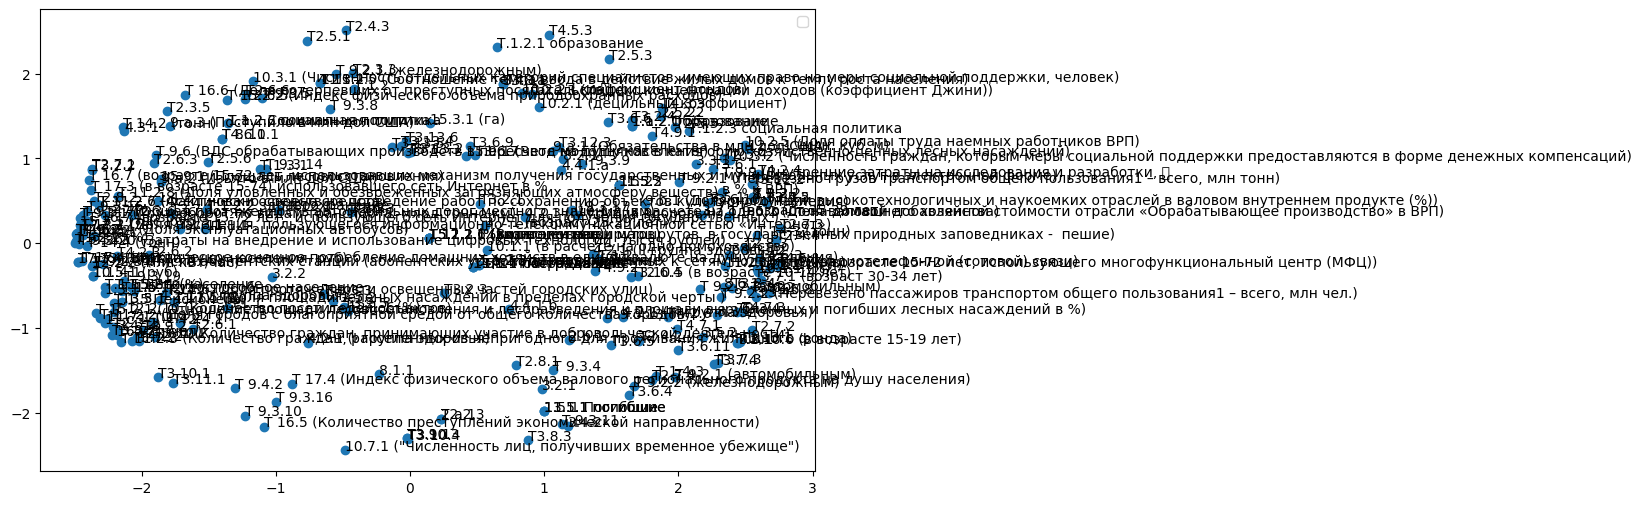

In [32]:
plot(scaled_df_ro_dim_red, "PC1", "PC2")

### Кластеризация

In [33]:
from sktime.clustering.k_means import TimeSeriesKMeans

In [34]:
hierarchial_clustering = AgglomerativeClustering(n_clusters=5)
kmeans = TimeSeriesKMeans(n_clusters=5) 

In [35]:
no_reduce_df_labels_agglom = hierarchial_clustering.fit_predict(scaled_df_ro)
no_reduce_df_labels_kmeans = kmeans.fit_predict(np.array(scaled_df_ro).reshape(*(np.array(scaled_df_ro).shape),1))

In [36]:
df_ro_clusters = df_ro.copy()

In [37]:
df_ro_clusters["AgglomerativeClustering"] = no_reduce_df_labels_agglom
scaled_df_ro_dim_red["AgglomerativeClustering"] = no_reduce_df_labels_agglom

df_ro_clusters["KMeans"] = no_reduce_df_labels_kmeans
scaled_df_ro_dim_red["KMeans"] = no_reduce_df_labels_kmeans

Результаты AgglomerativeClustering

) missing from current font.s\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


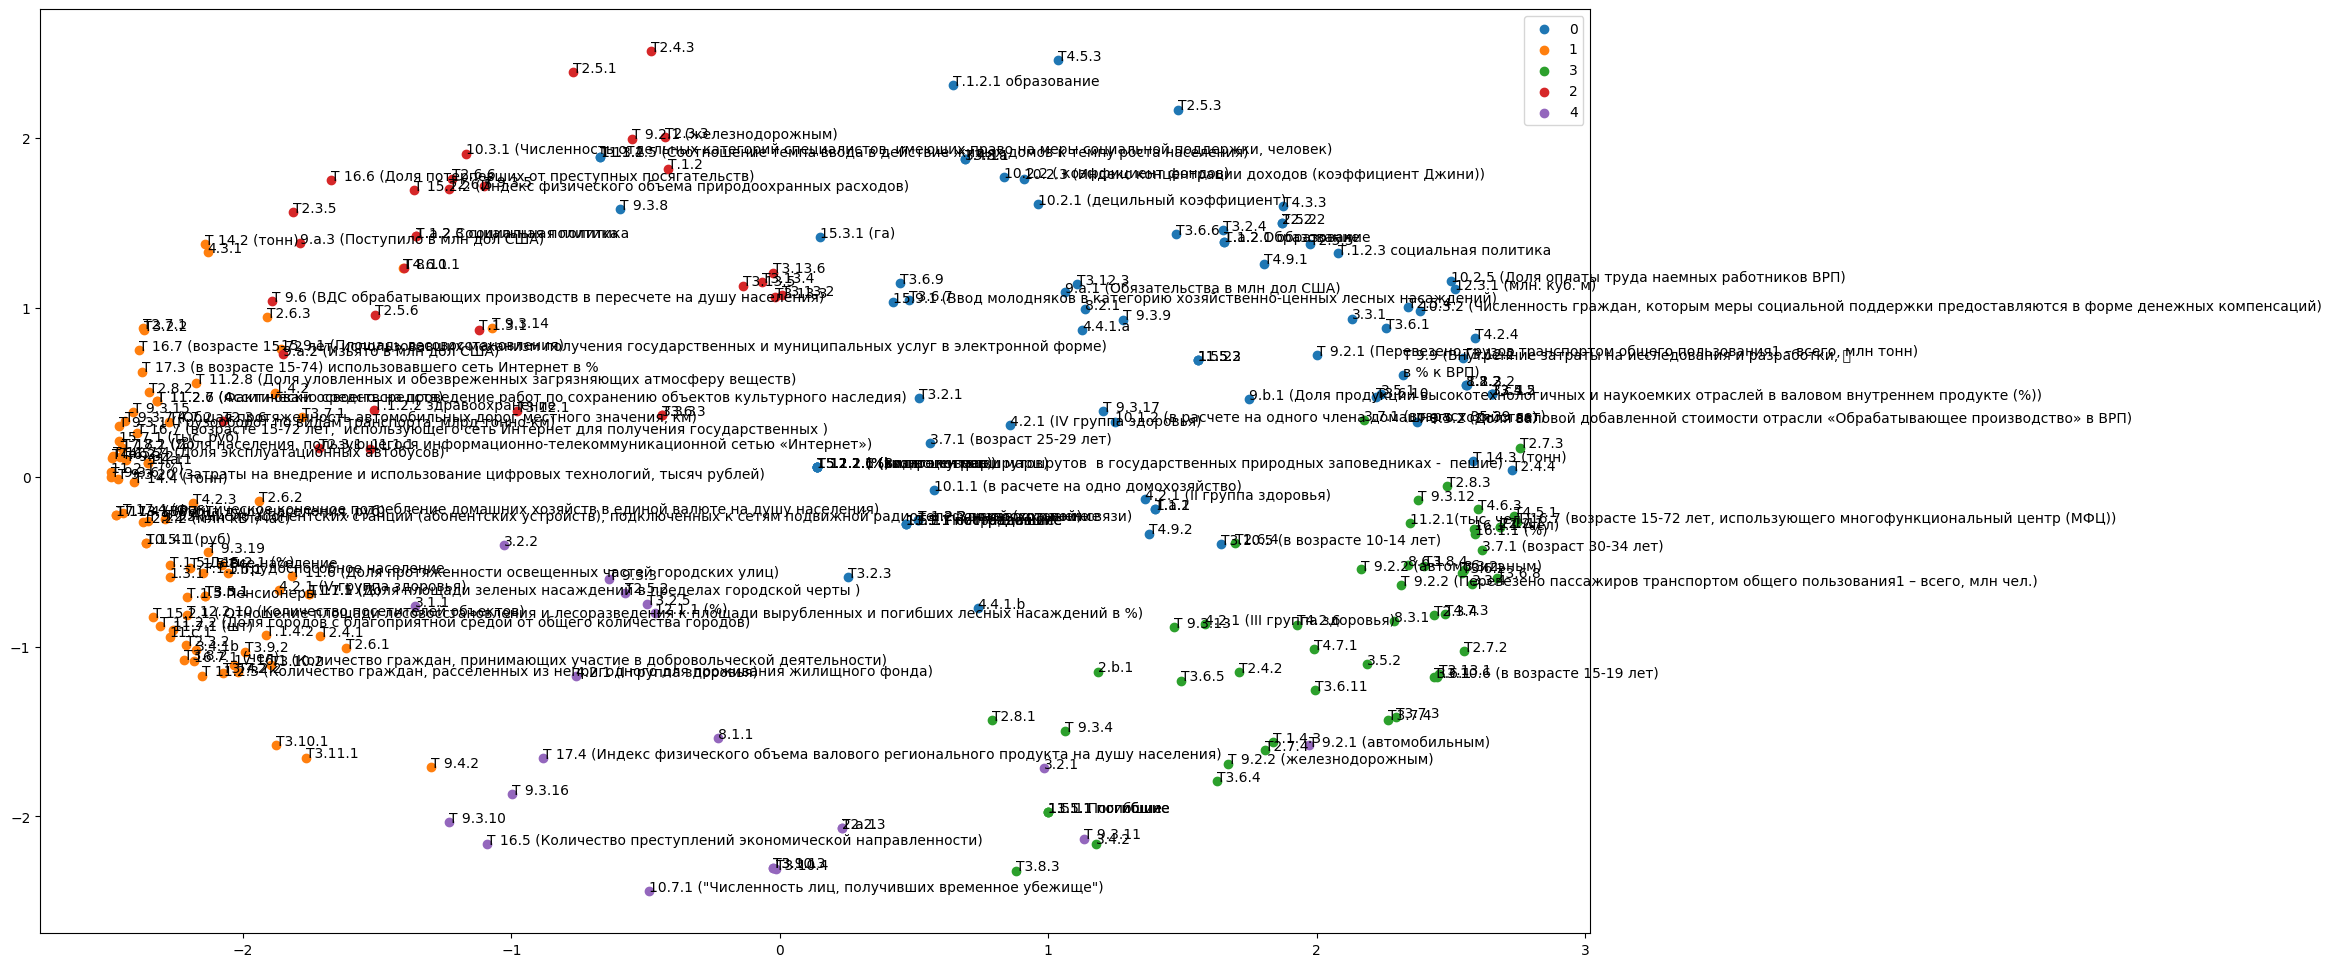

In [38]:
plot_clusters(scaled_df_ro_dim_red, "PC1", "PC2", "AgglomerativeClustering")

Результаты KMeans

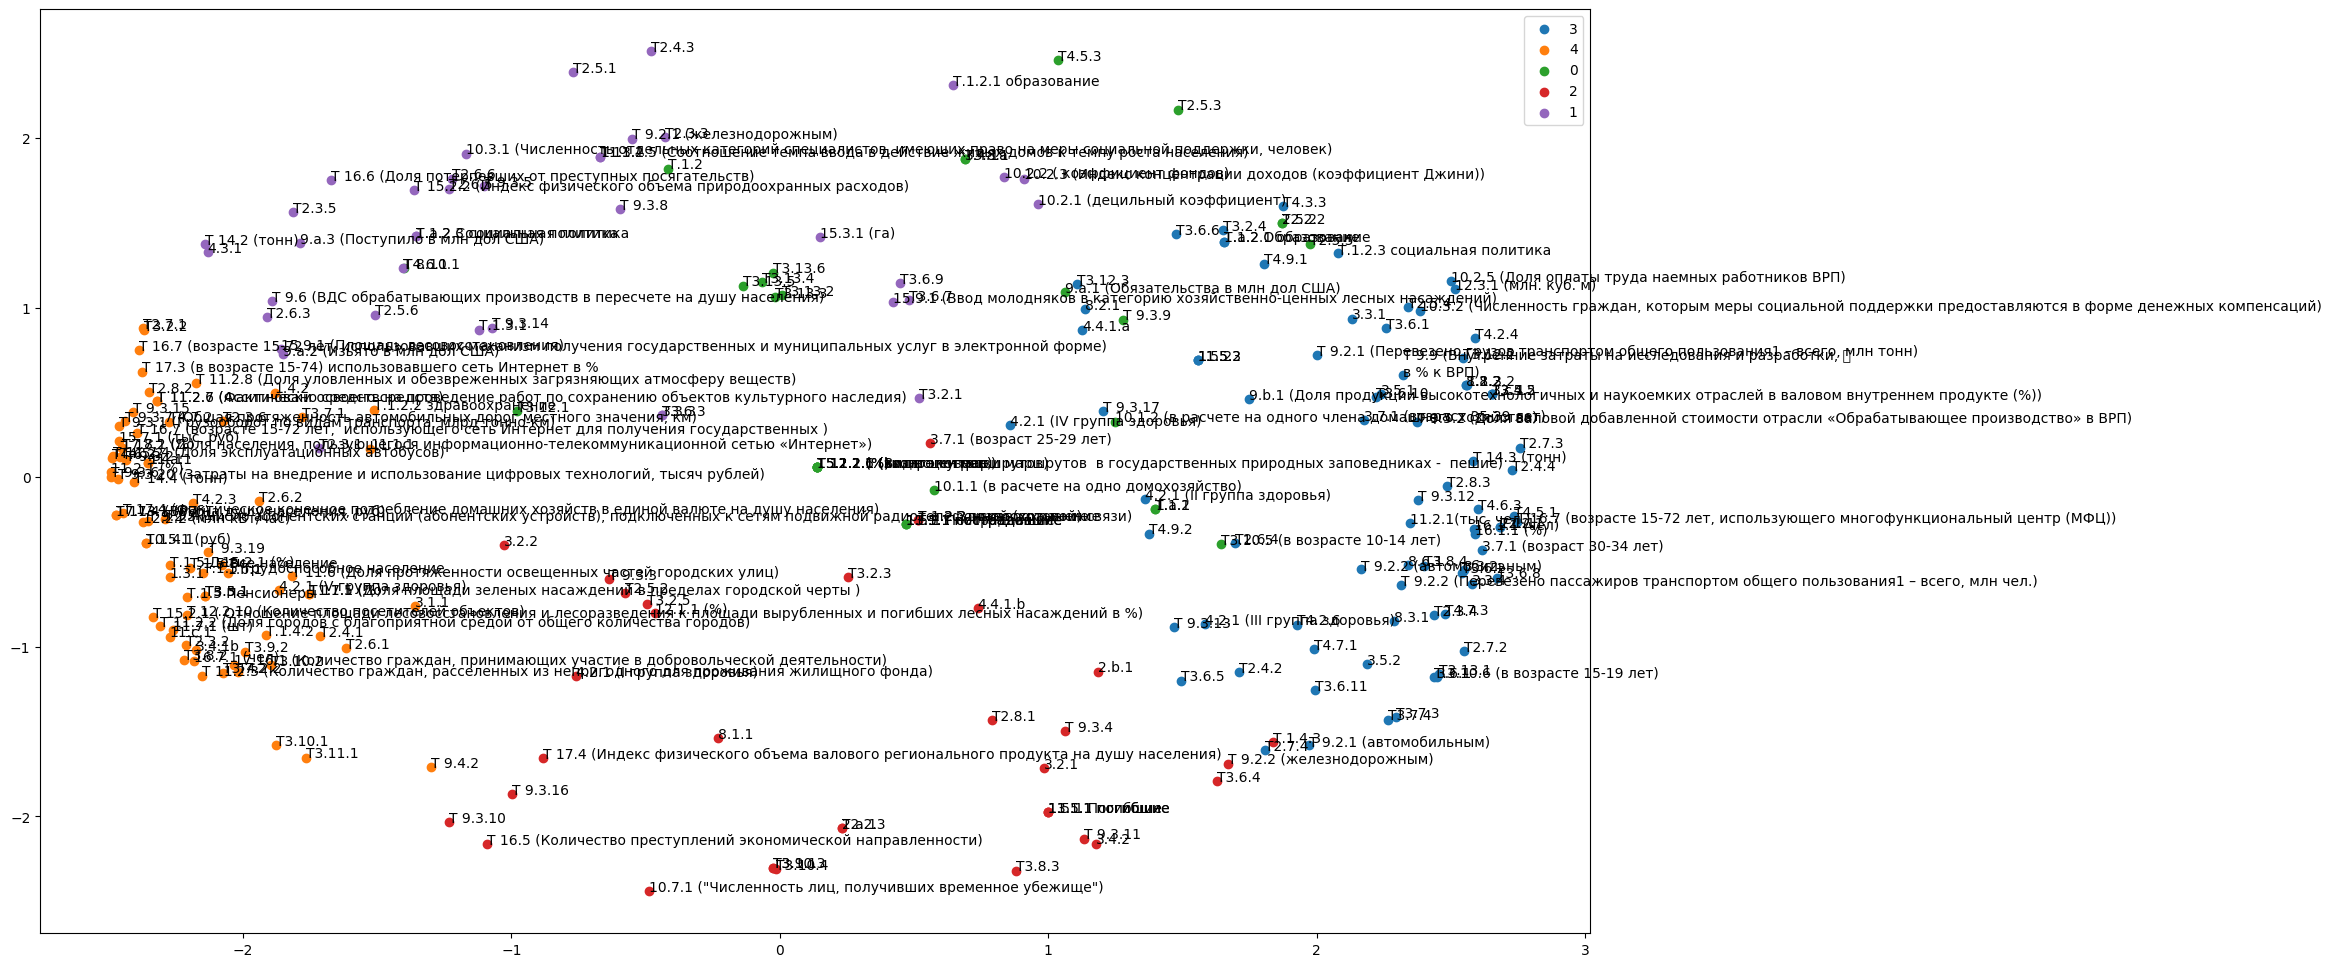

In [39]:
plot_clusters(scaled_df_ro_dim_red, "PC1", "PC2", "KMeans")

In [40]:
df_ro_clusters.to_csv("./result_data/clustering_results/cluster_labels.csv")

### Матрицы корреляций по кластерам

In [41]:
scaled_df_ro_clusters = scaled_df_ro.copy()
df_ro_clusters["AgglomerativeClustering"] = no_reduce_df_labels_agglom
df_ro_clusters["KMeans"] = no_reduce_df_labels_kmeans

scaled_df_ro_clusters["AgglomerativeClustering"] = no_reduce_df_labels_agglom
scaled_df_ro_clusters["KMeans"] = no_reduce_df_labels_kmeans

In [42]:
scaled_df_ro_clusters["AgglomerativeClustering"].unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [43]:
scaled_df_ro_clusters["KMeans"].unique()

array([3, 4, 0, 2, 1], dtype=int64)

In [44]:
clusters_agglom = []
clusters_kmeans = []
for i in scaled_df_ro_clusters["AgglomerativeClustering"].unique():
    clusters_agglom.append(scaled_df_ro_clusters[scaled_df_ro_clusters["AgglomerativeClustering"] == i])

for i in scaled_df_ro_clusters["KMeans"].unique():
    clusters_kmeans.append(scaled_df_ro_clusters[scaled_df_ro_clusters["KMeans"] == i])

) missing from current font.s\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font.s\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font.s\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font.s\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font.s\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font.s\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font.s\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font.s\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font.s\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font.s\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font.s\IPython\core\pylabto

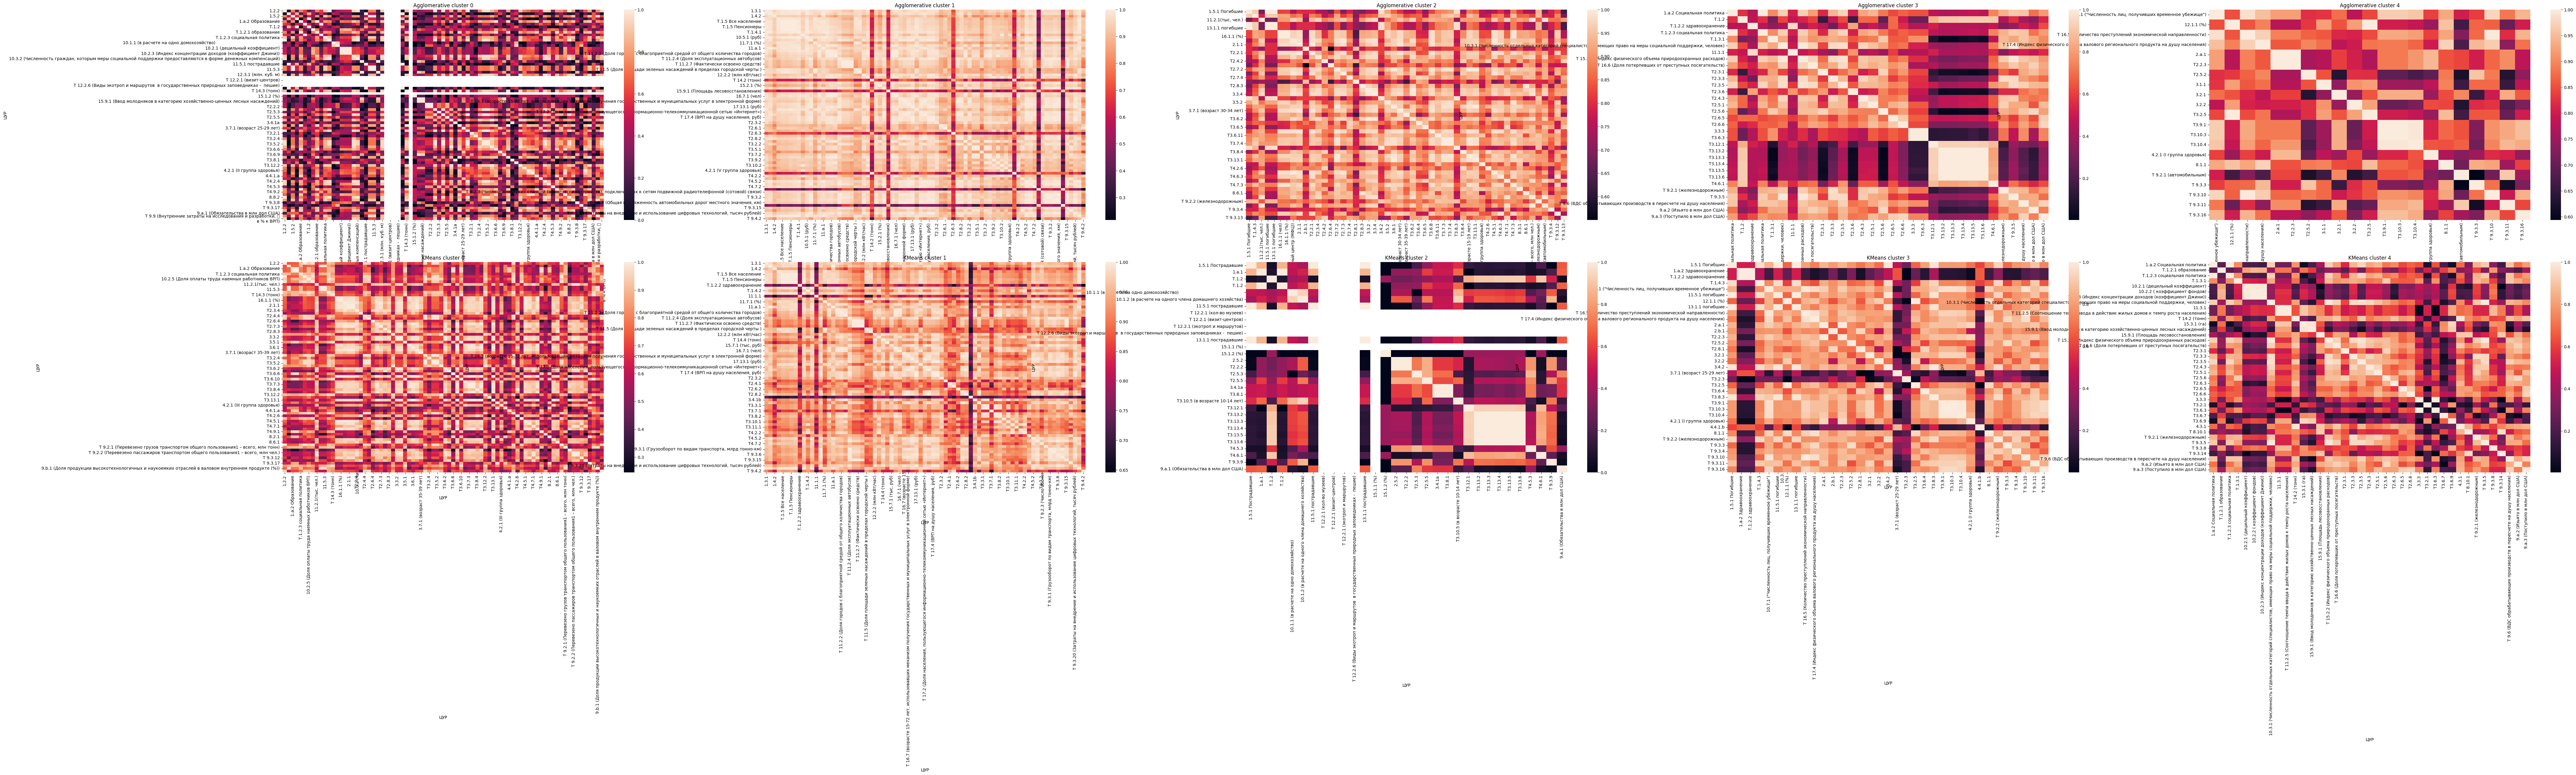

In [45]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=2, ncols=len(scaled_df_ro_clusters["KMeans"].unique()), figsize=(100, 20))

# Plot data on each subplot

for j in range(len(clusters_agglom)):
    clusters_agglom[j].T.corr().abs().to_csv(f"./result_data/agglomerative_clusters_corr_matricies/csv/agglomerative_cluster_{j}_corr_mat.csv")
    sns.heatmap(clusters_agglom[j].T.corr().abs(), ax=axs[0][j])
    axs[0][j].set_title(f'Agglomerative cluster {j}')

for j in range(len(clusters_kmeans)):
    clusters_kmeans[j].T.corr().abs().to_csv(f"./result_data/kmeans_clusters_corr_matricies/csv/kmeans_cluster_{j}_corr_mat.csv")
    sns.heatmap(clusters_kmeans[j].T.corr().abs(), ax=axs[1][j])
    axs[1][j].set_title(f'KMeans cluster {j}')

# # Remove unused subplots
# for i in range(2, 6):
#     fig.delaxes(axs[1, i])

# Display the figure with subplots
plt.show()


#### AgglomerativeClustering матрицы корреляций по кластерам

) missing from current font.s\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()


<Axes: xlabel='ЦУР', ylabel='ЦУР'>

) missing from current font.s\IPython\core\events.py:82: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.s\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


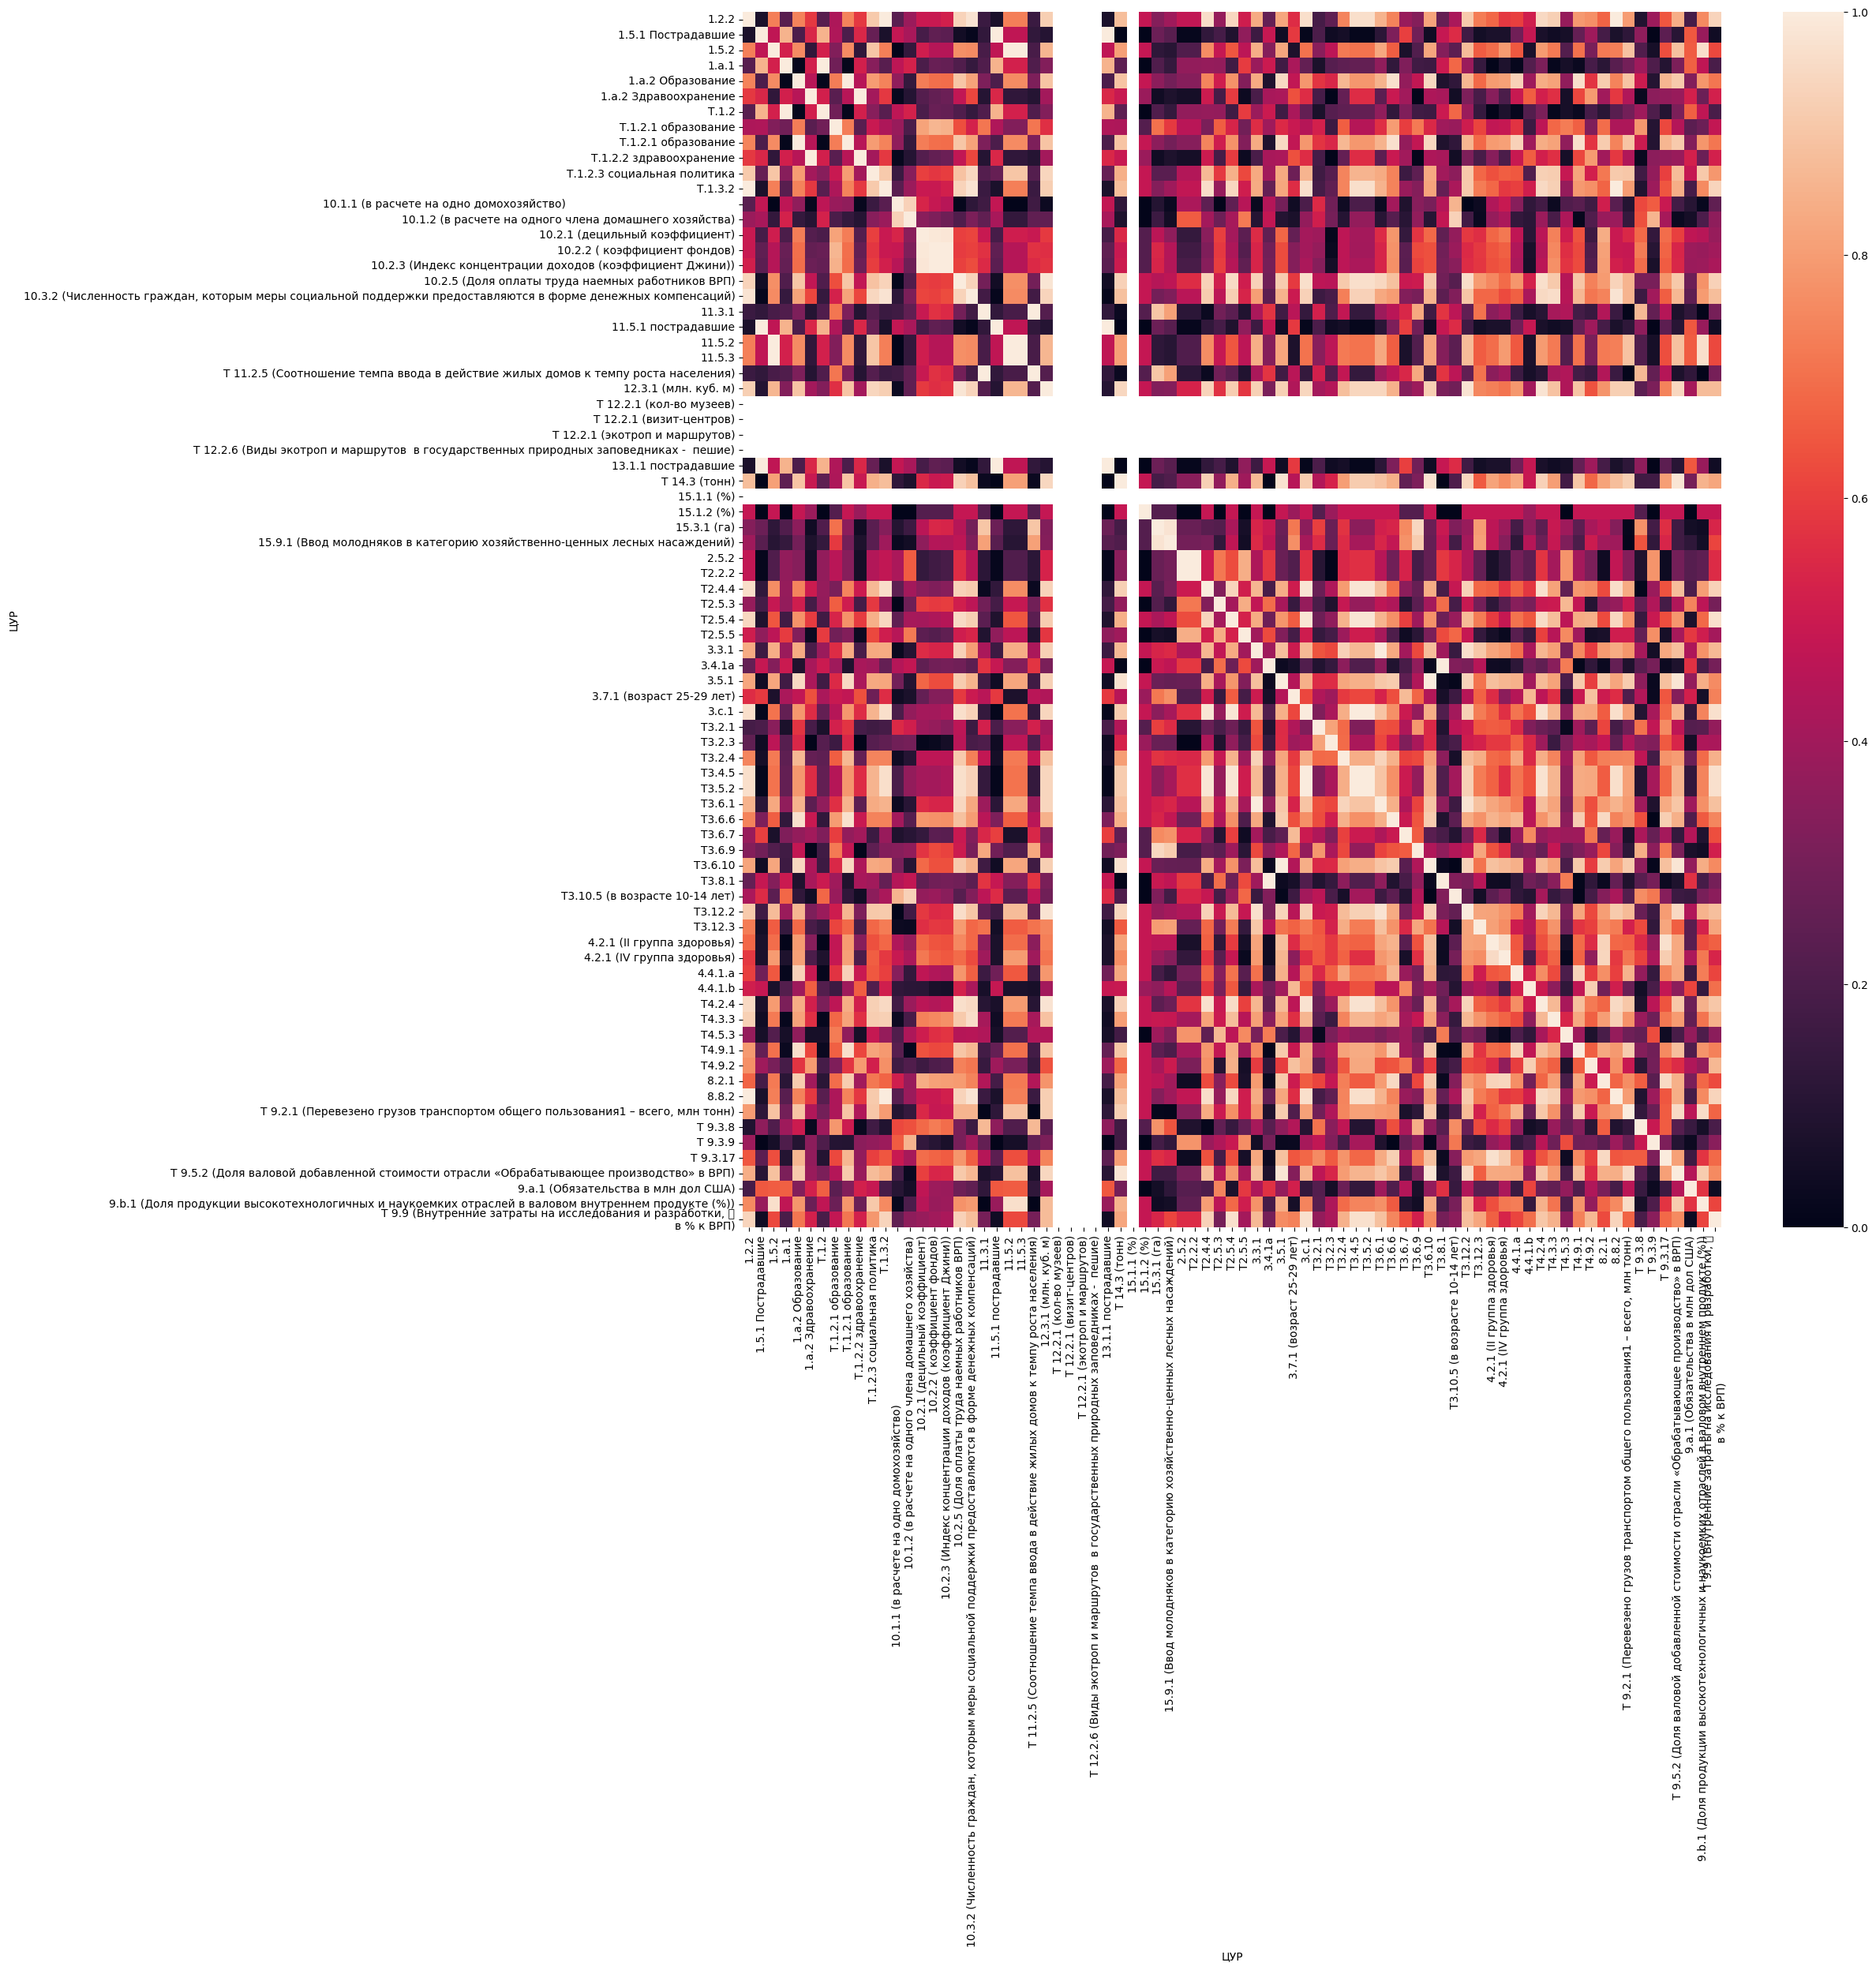

In [72]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(clusters_agglom[0].T.corr().abs())

<Axes: xlabel='ЦУР', ylabel='ЦУР'>

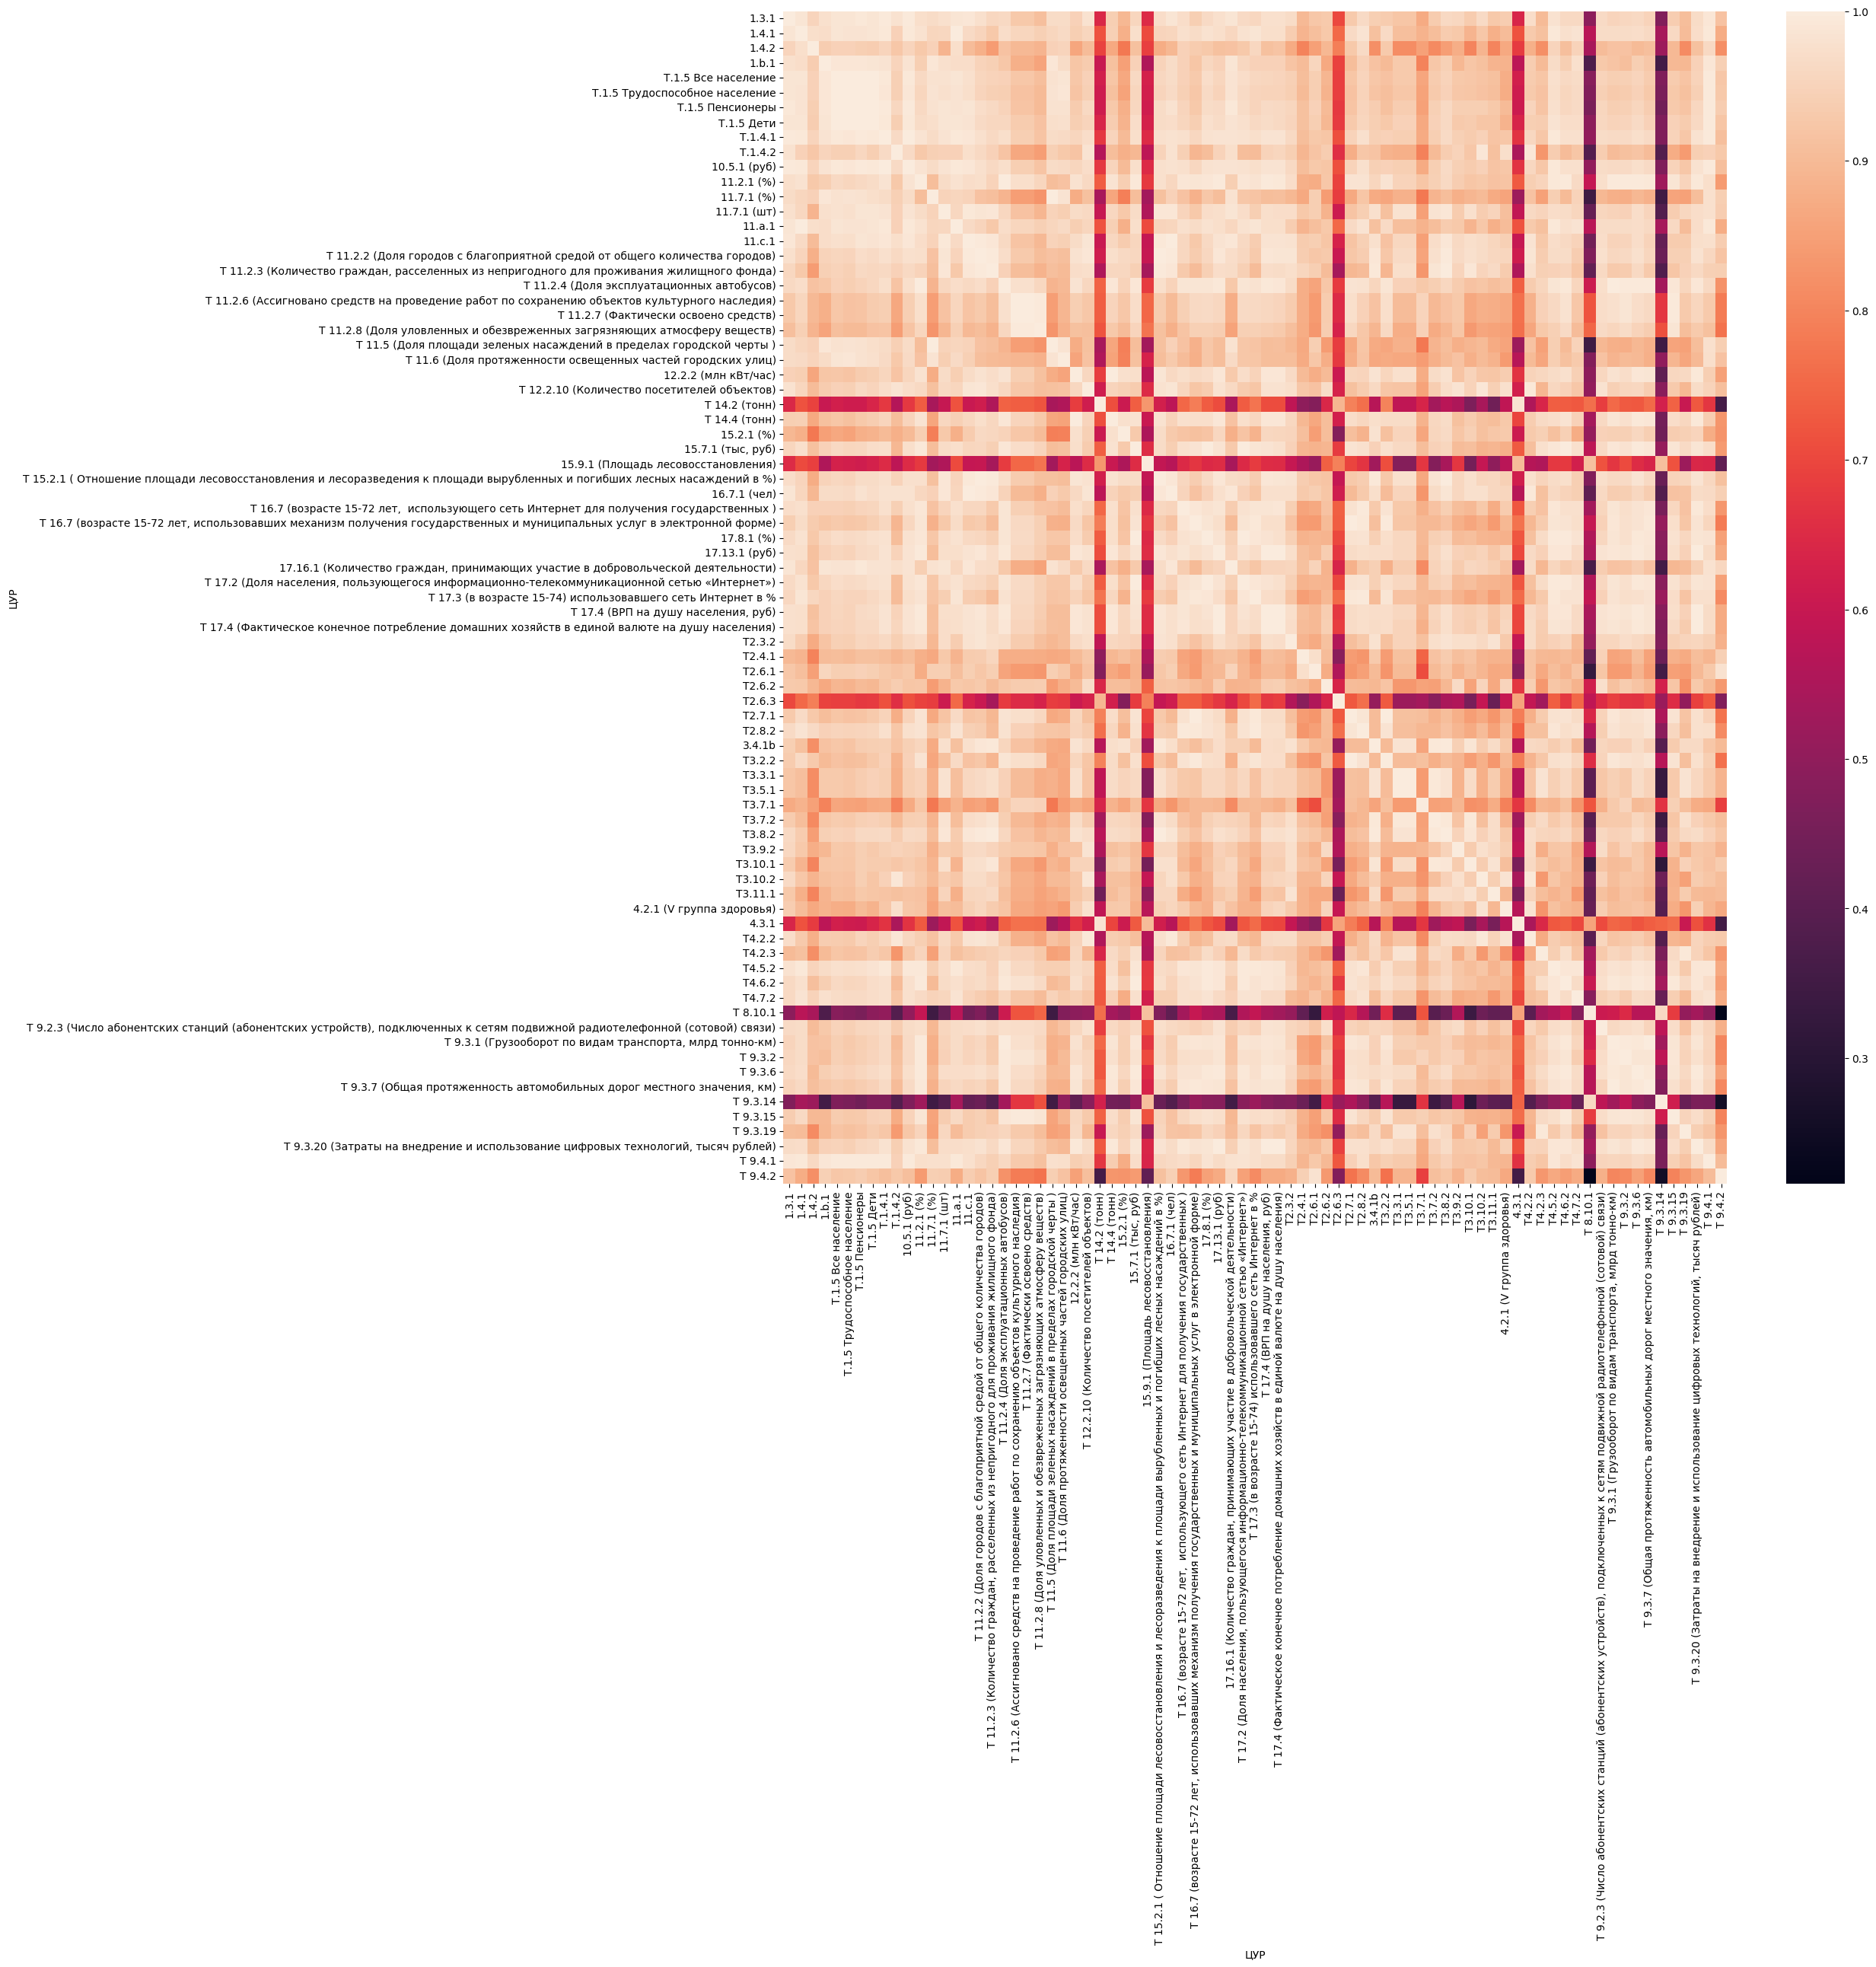

In [73]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(clusters_agglom[1].T.corr().abs())

<Axes: xlabel='ЦУР', ylabel='ЦУР'>

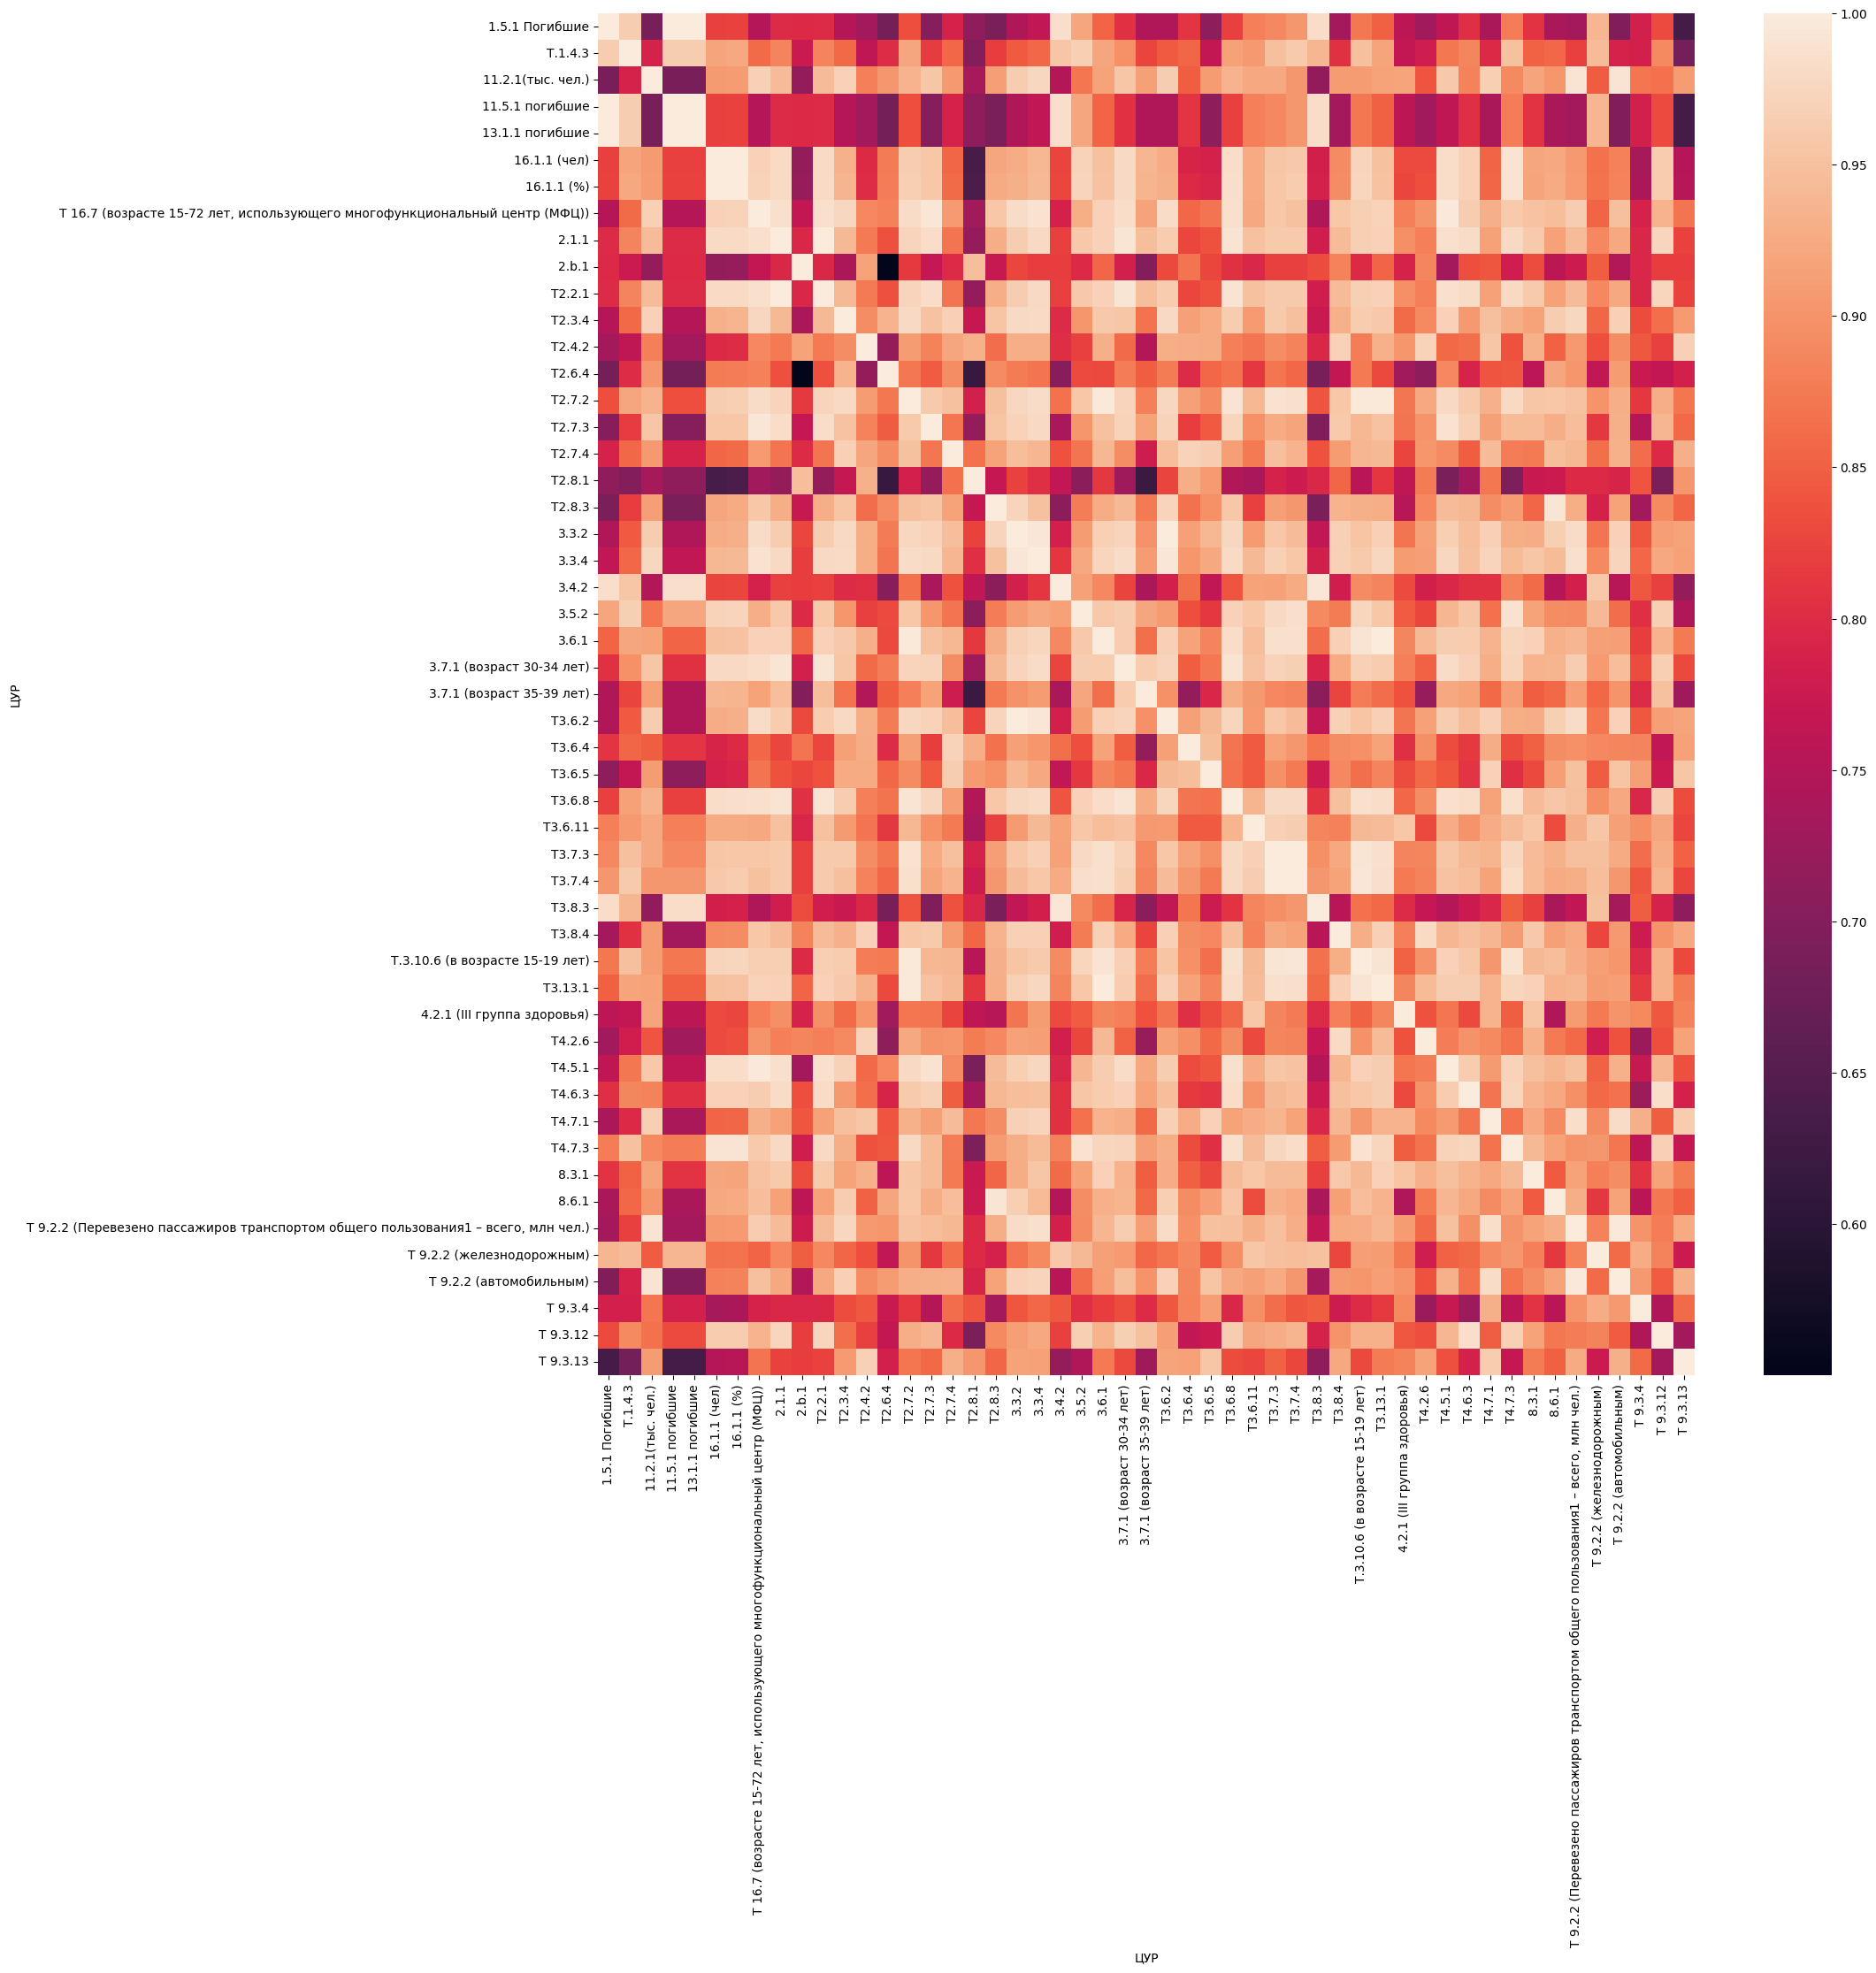

In [74]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(clusters_agglom[2].T.corr().abs())

<Axes: xlabel='ЦУР', ylabel='ЦУР'>

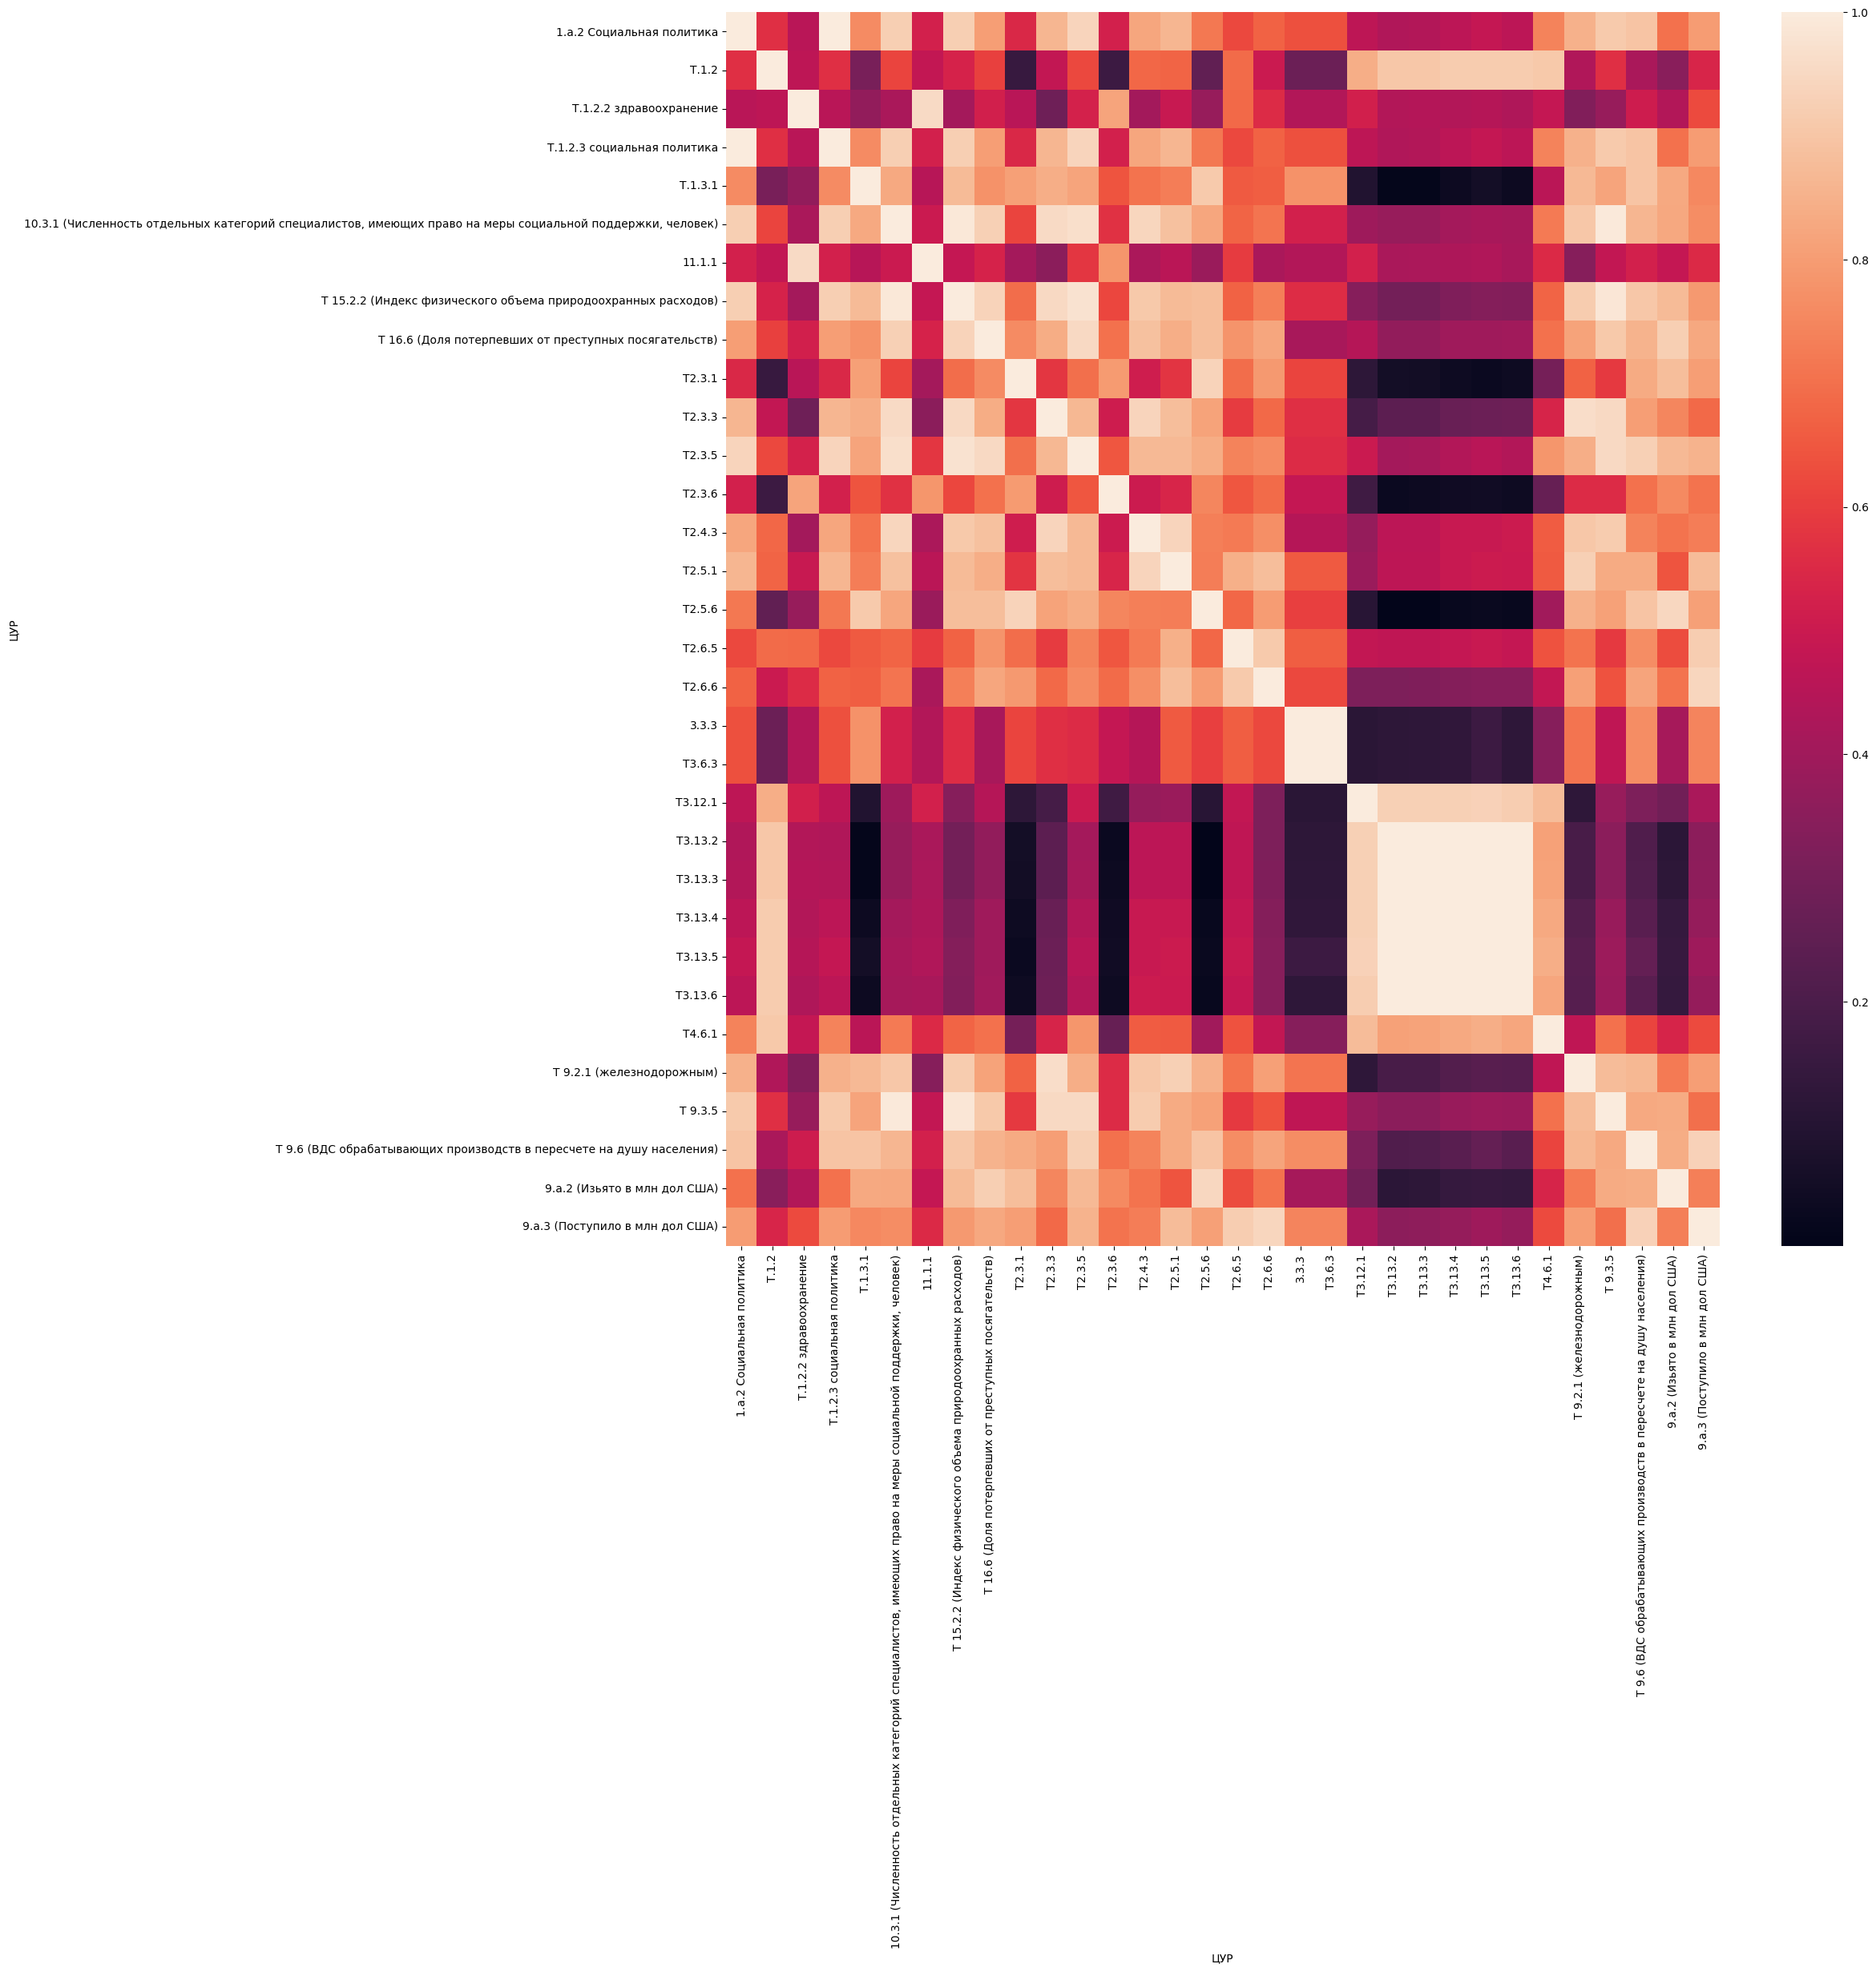

In [75]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(clusters_agglom[3].T.corr().abs())

<Axes: xlabel='ЦУР', ylabel='ЦУР'>

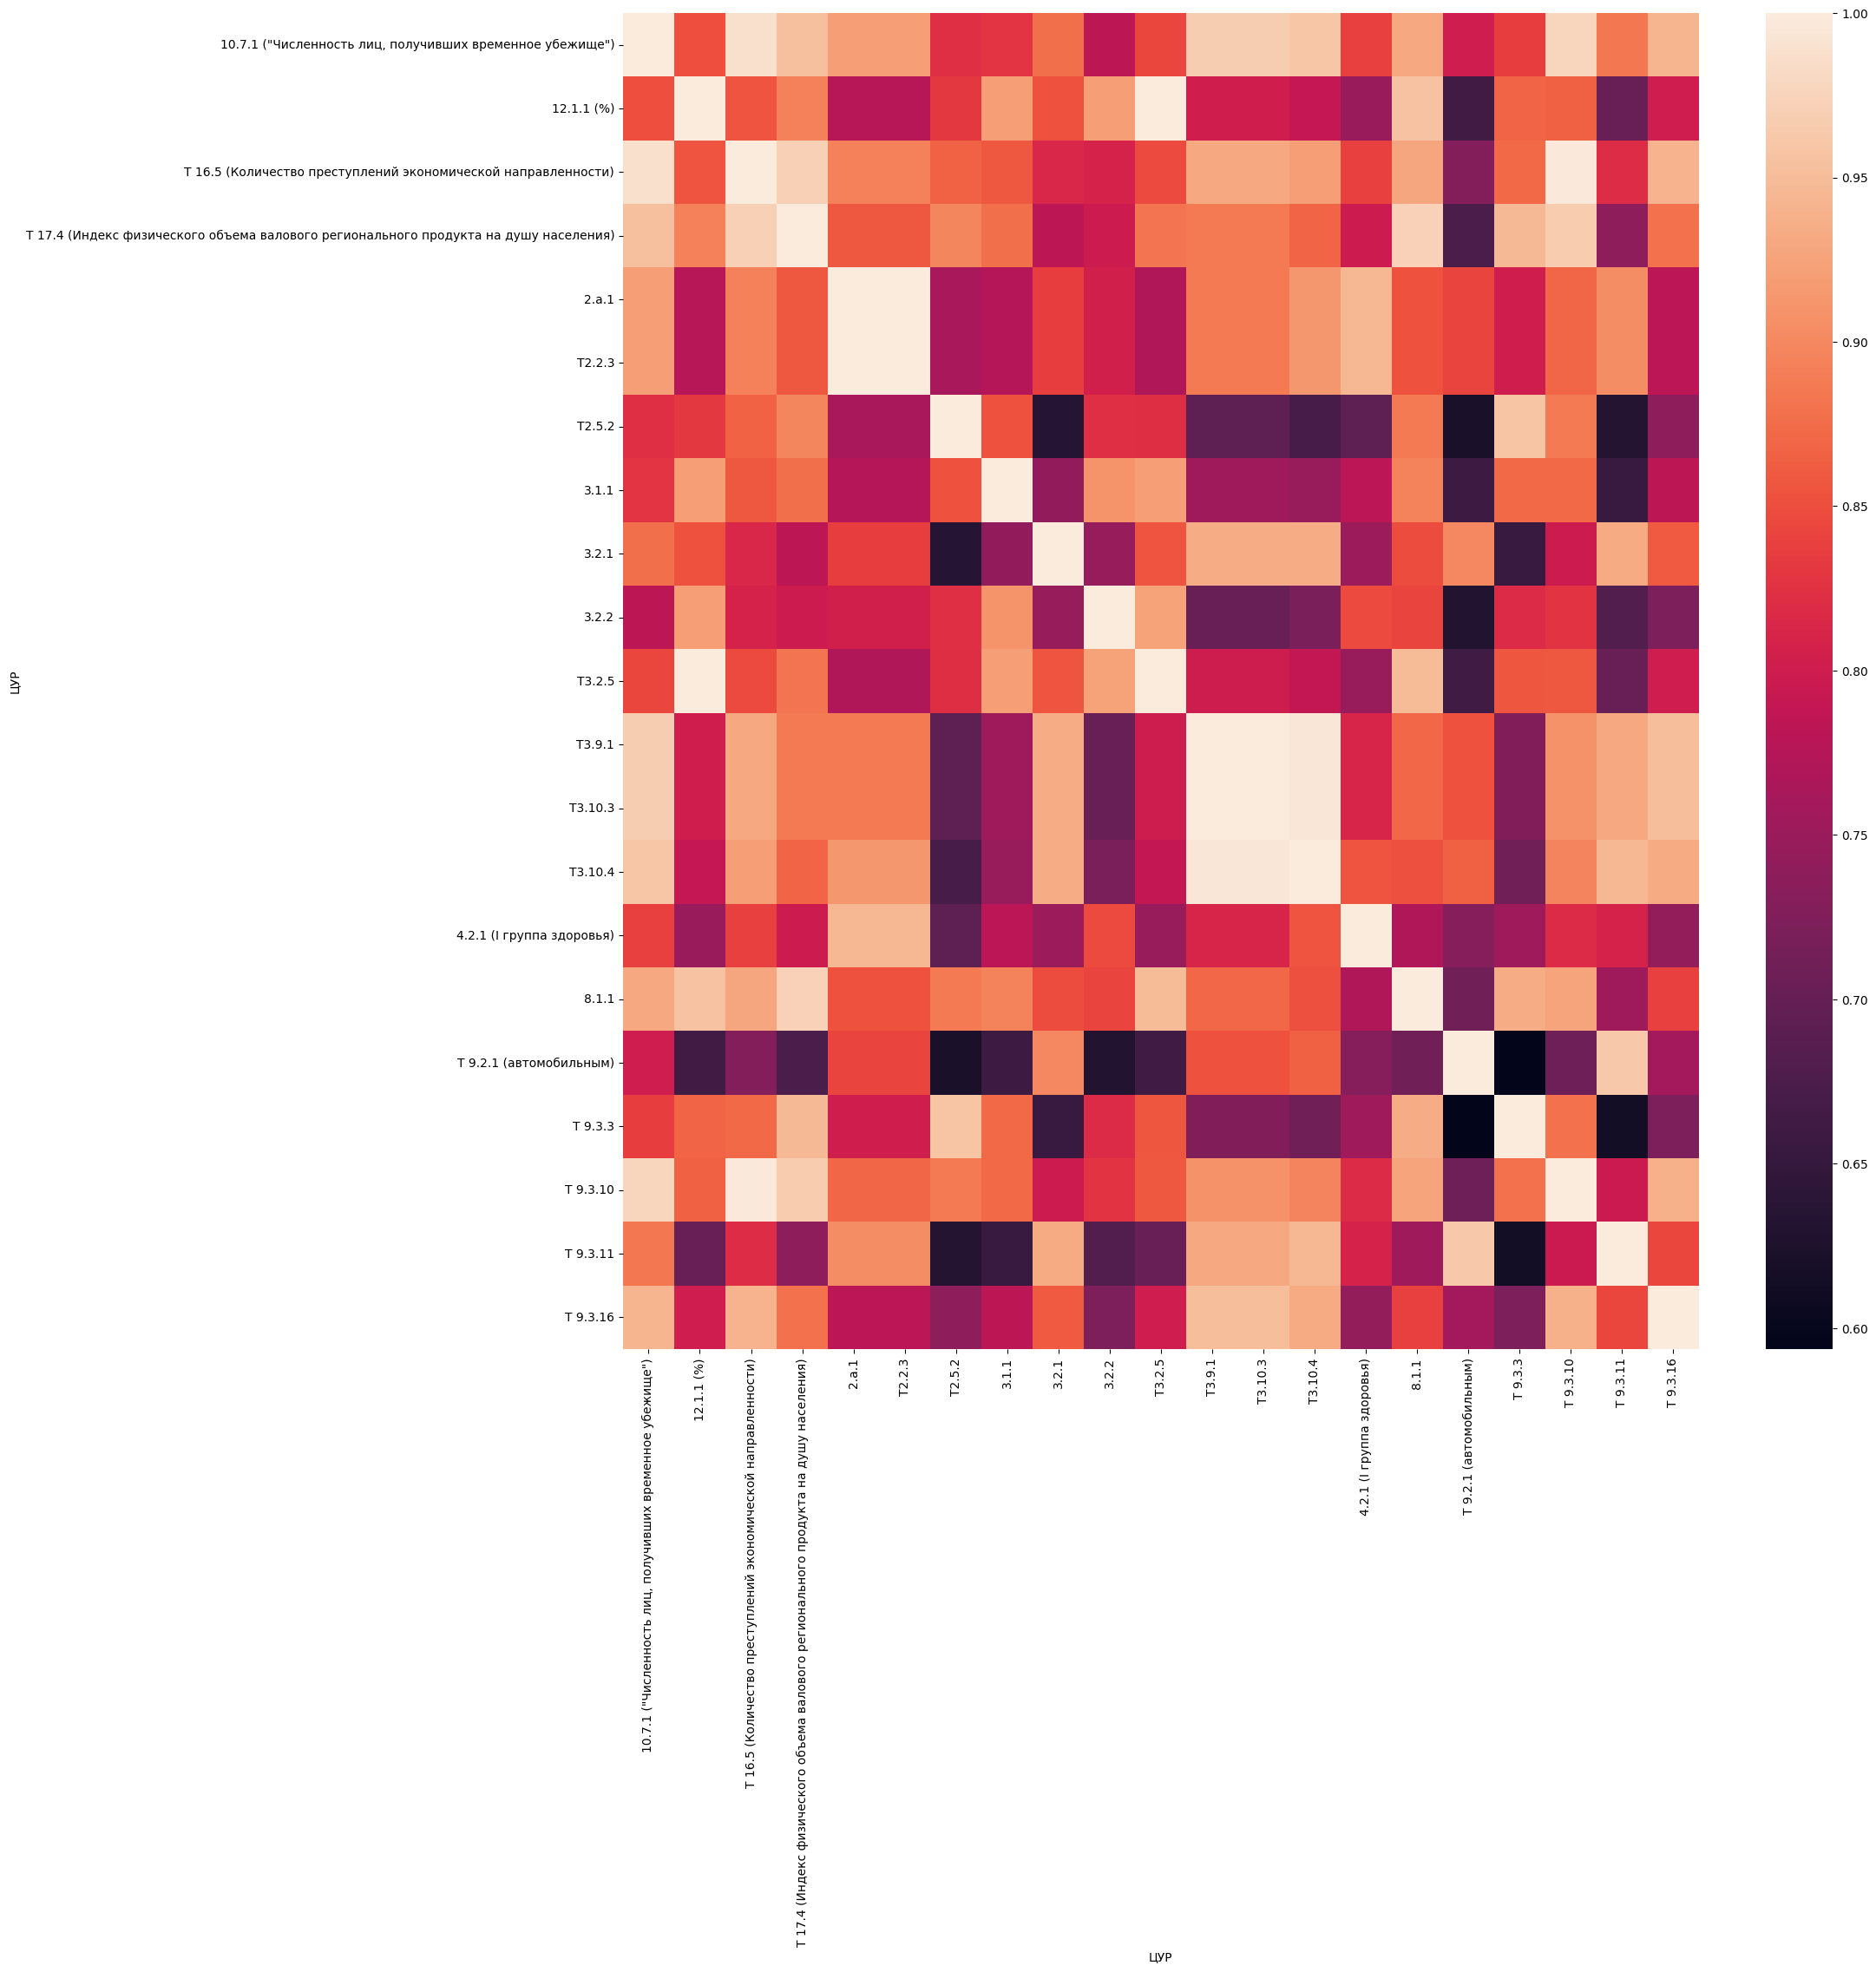

In [76]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(clusters_agglom[4].T.corr().abs())

#### Kmeans матрицы корреляций по кластерам

) missing from current font.s\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()


<Axes: xlabel='ЦУР', ylabel='ЦУР'>

) missing from current font.s\IPython\core\events.py:82: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.s\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


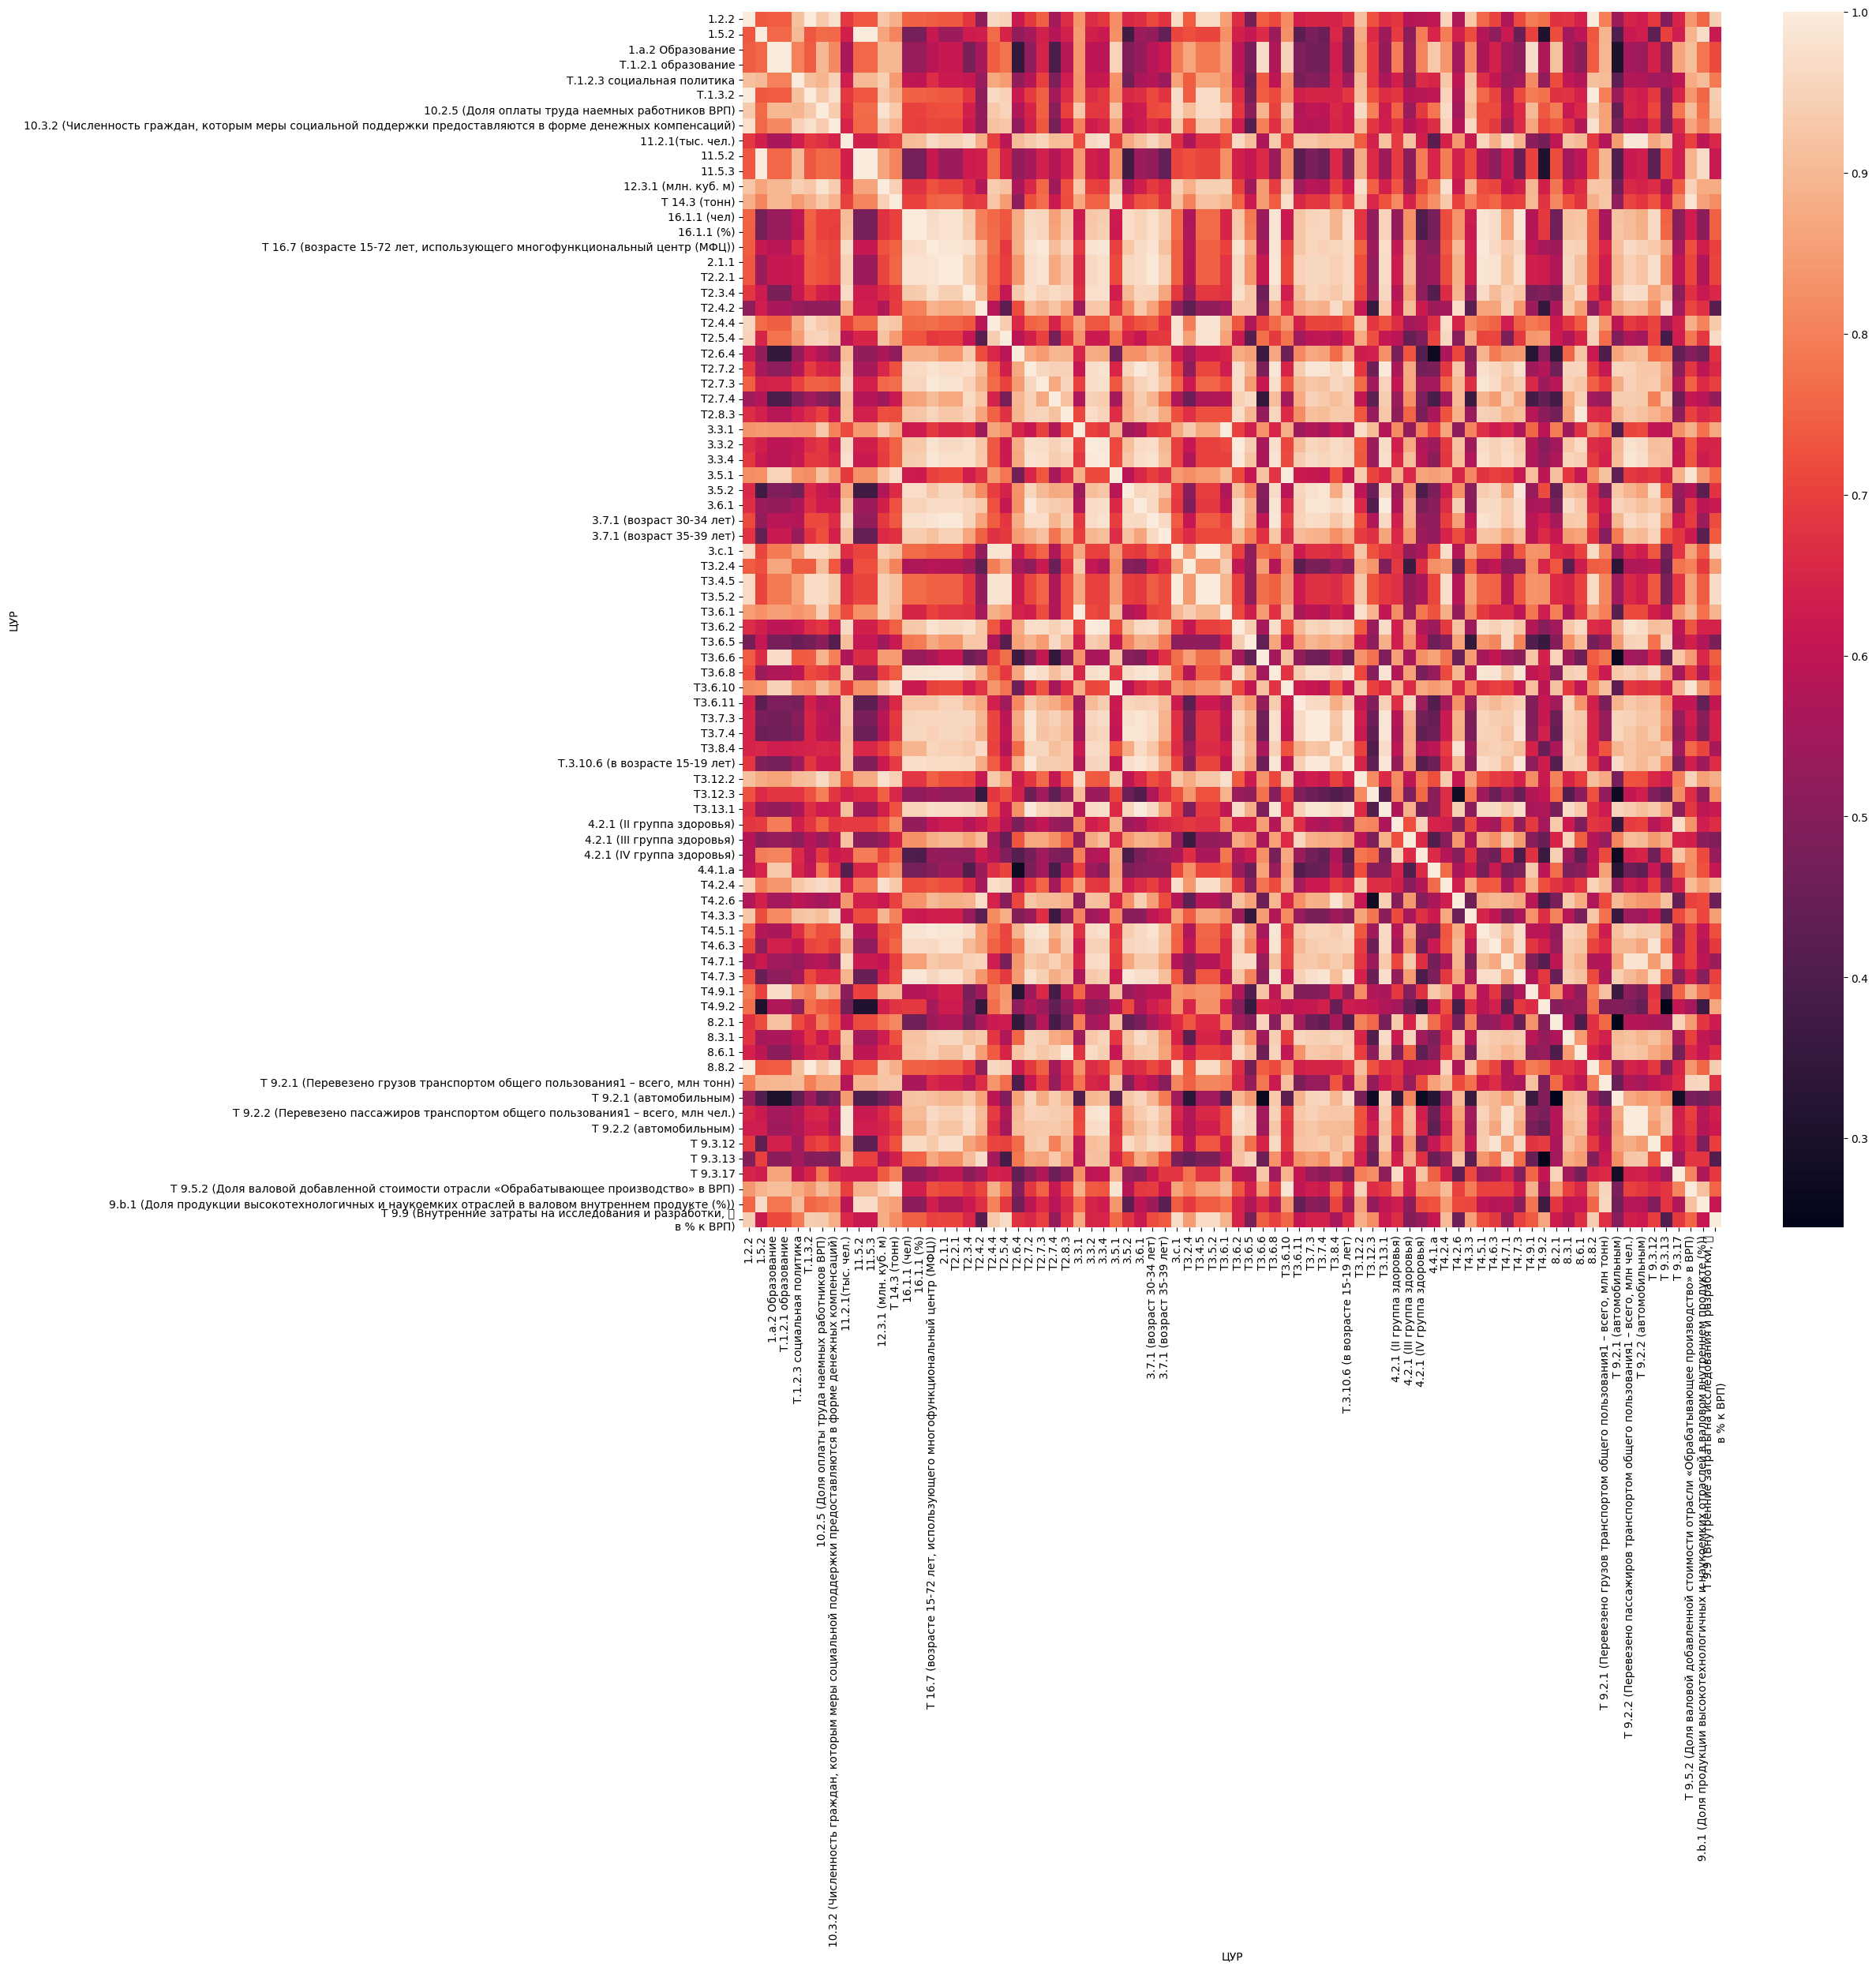

In [77]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(clusters_kmeans[0].T.corr().abs())

<Axes: xlabel='ЦУР', ylabel='ЦУР'>

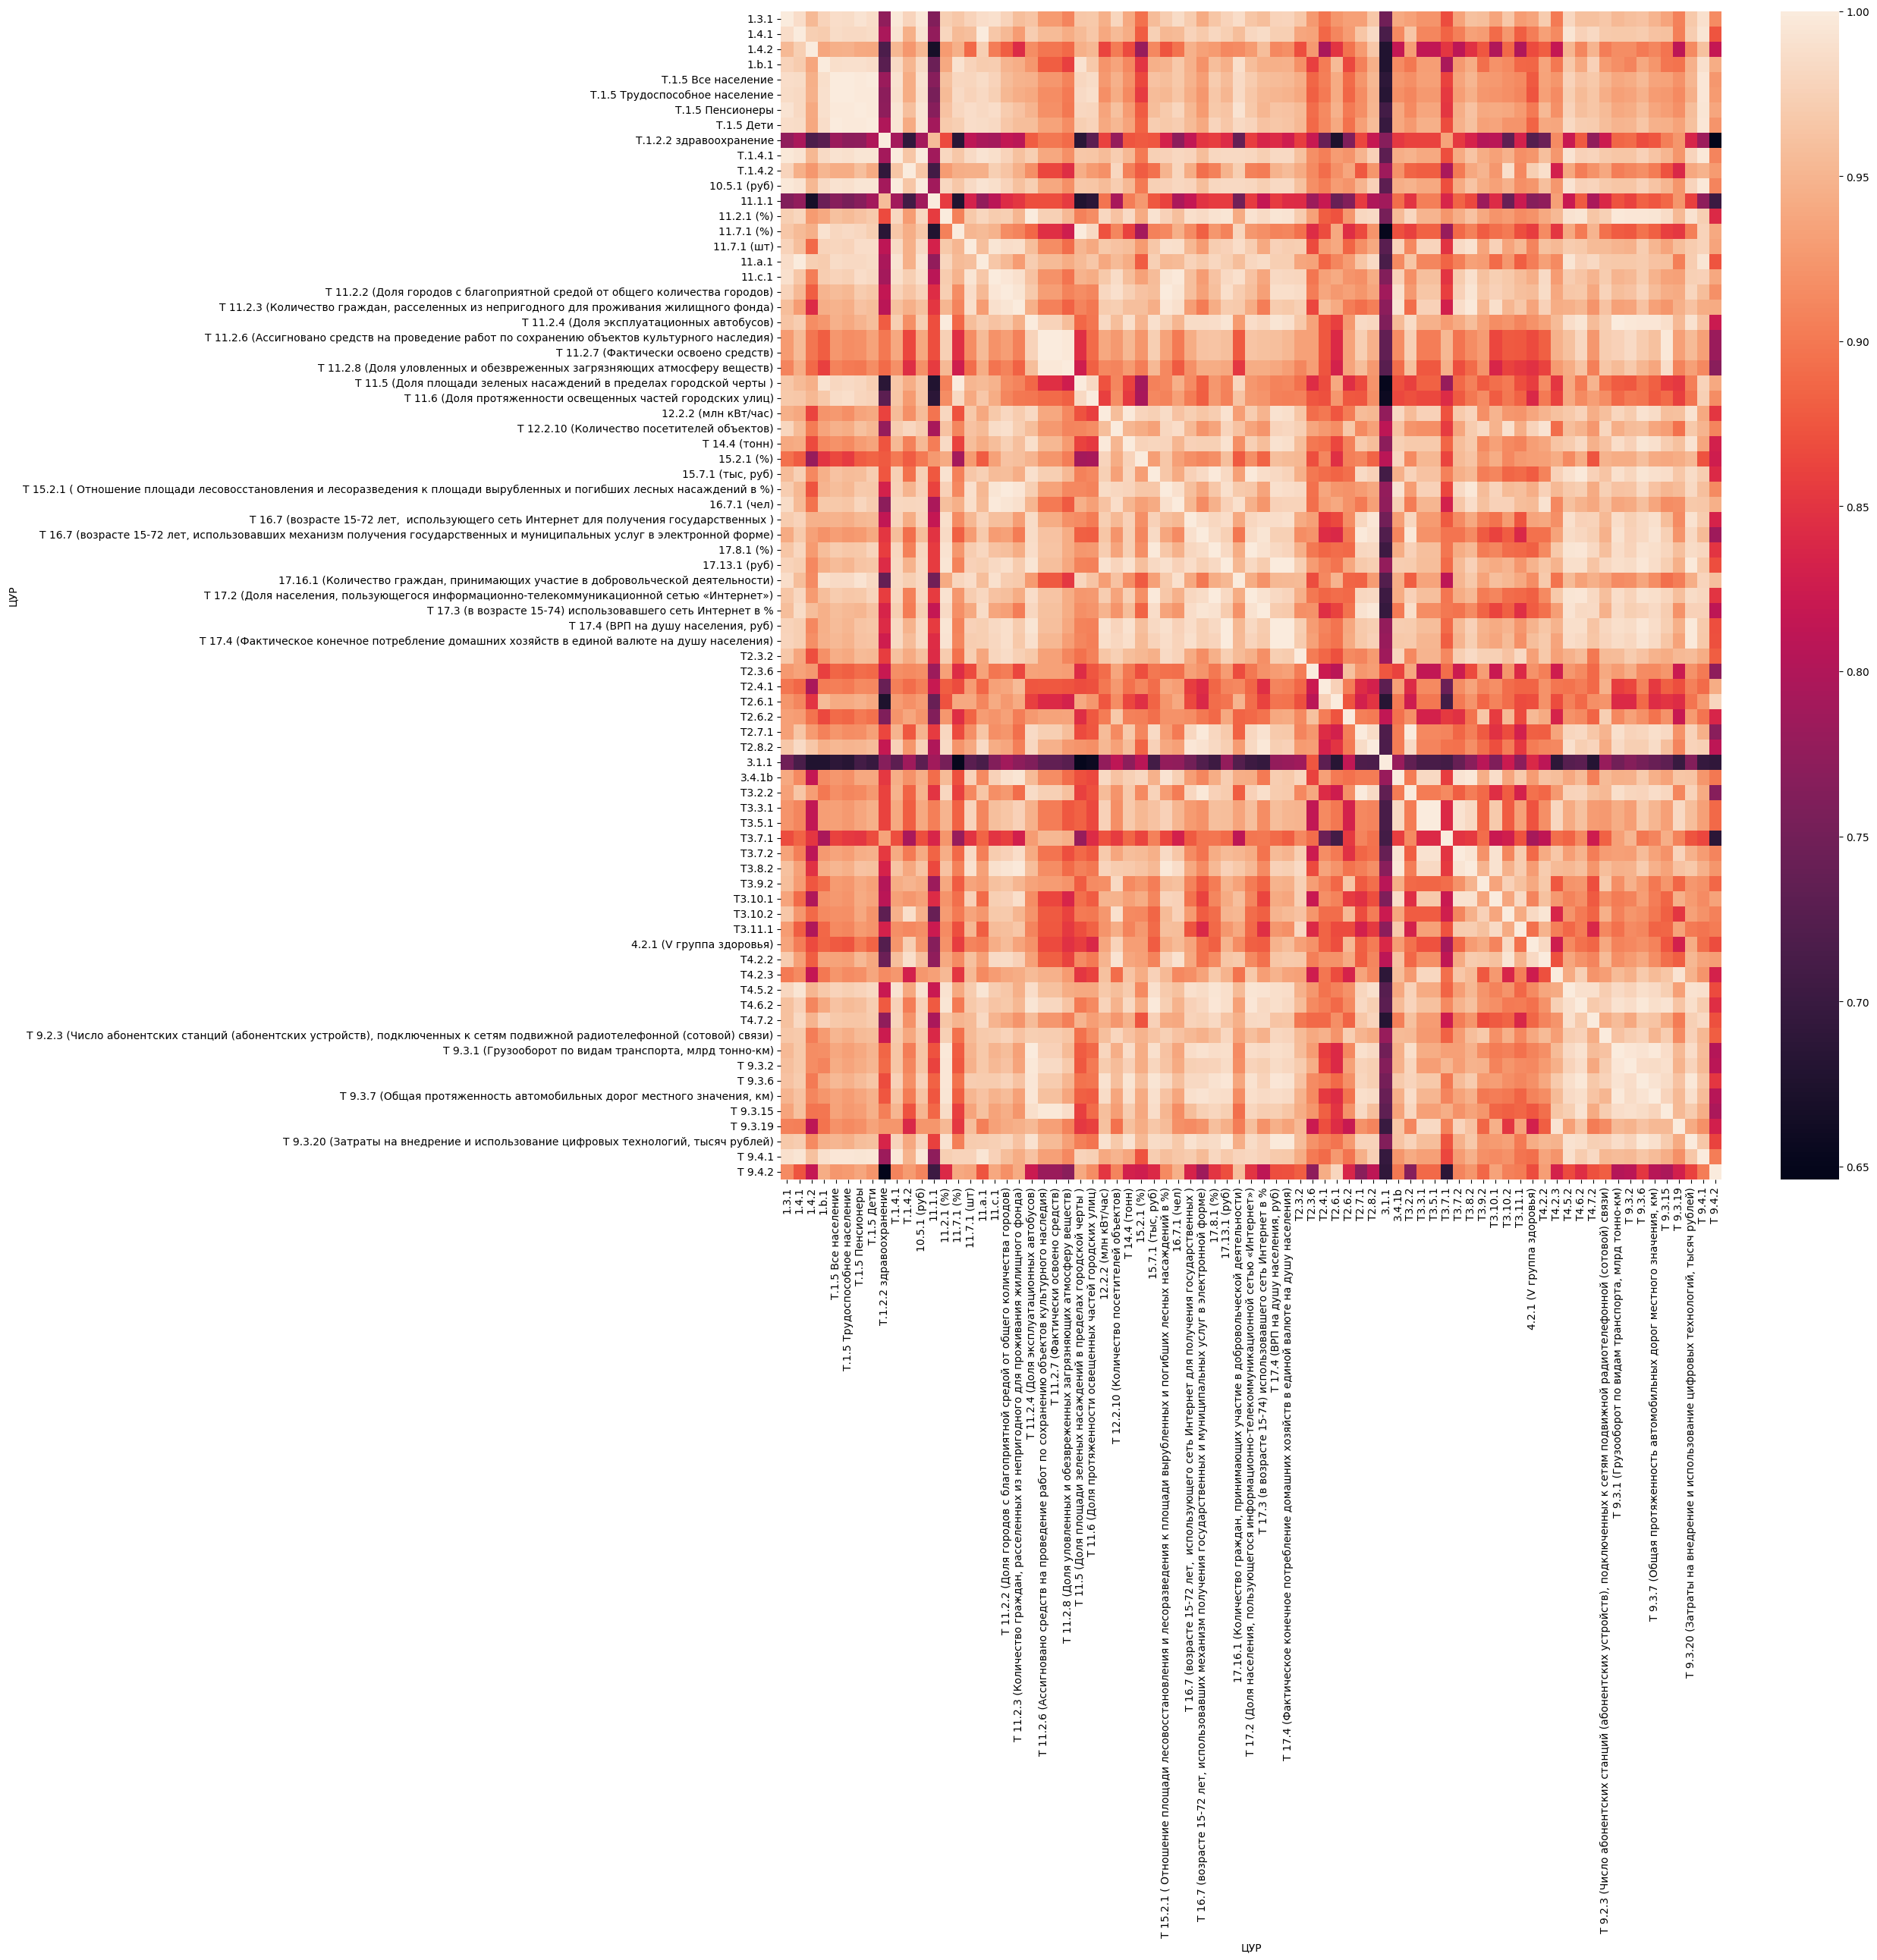

In [78]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(clusters_kmeans[1].T.corr().abs())

<Axes: xlabel='ЦУР', ylabel='ЦУР'>

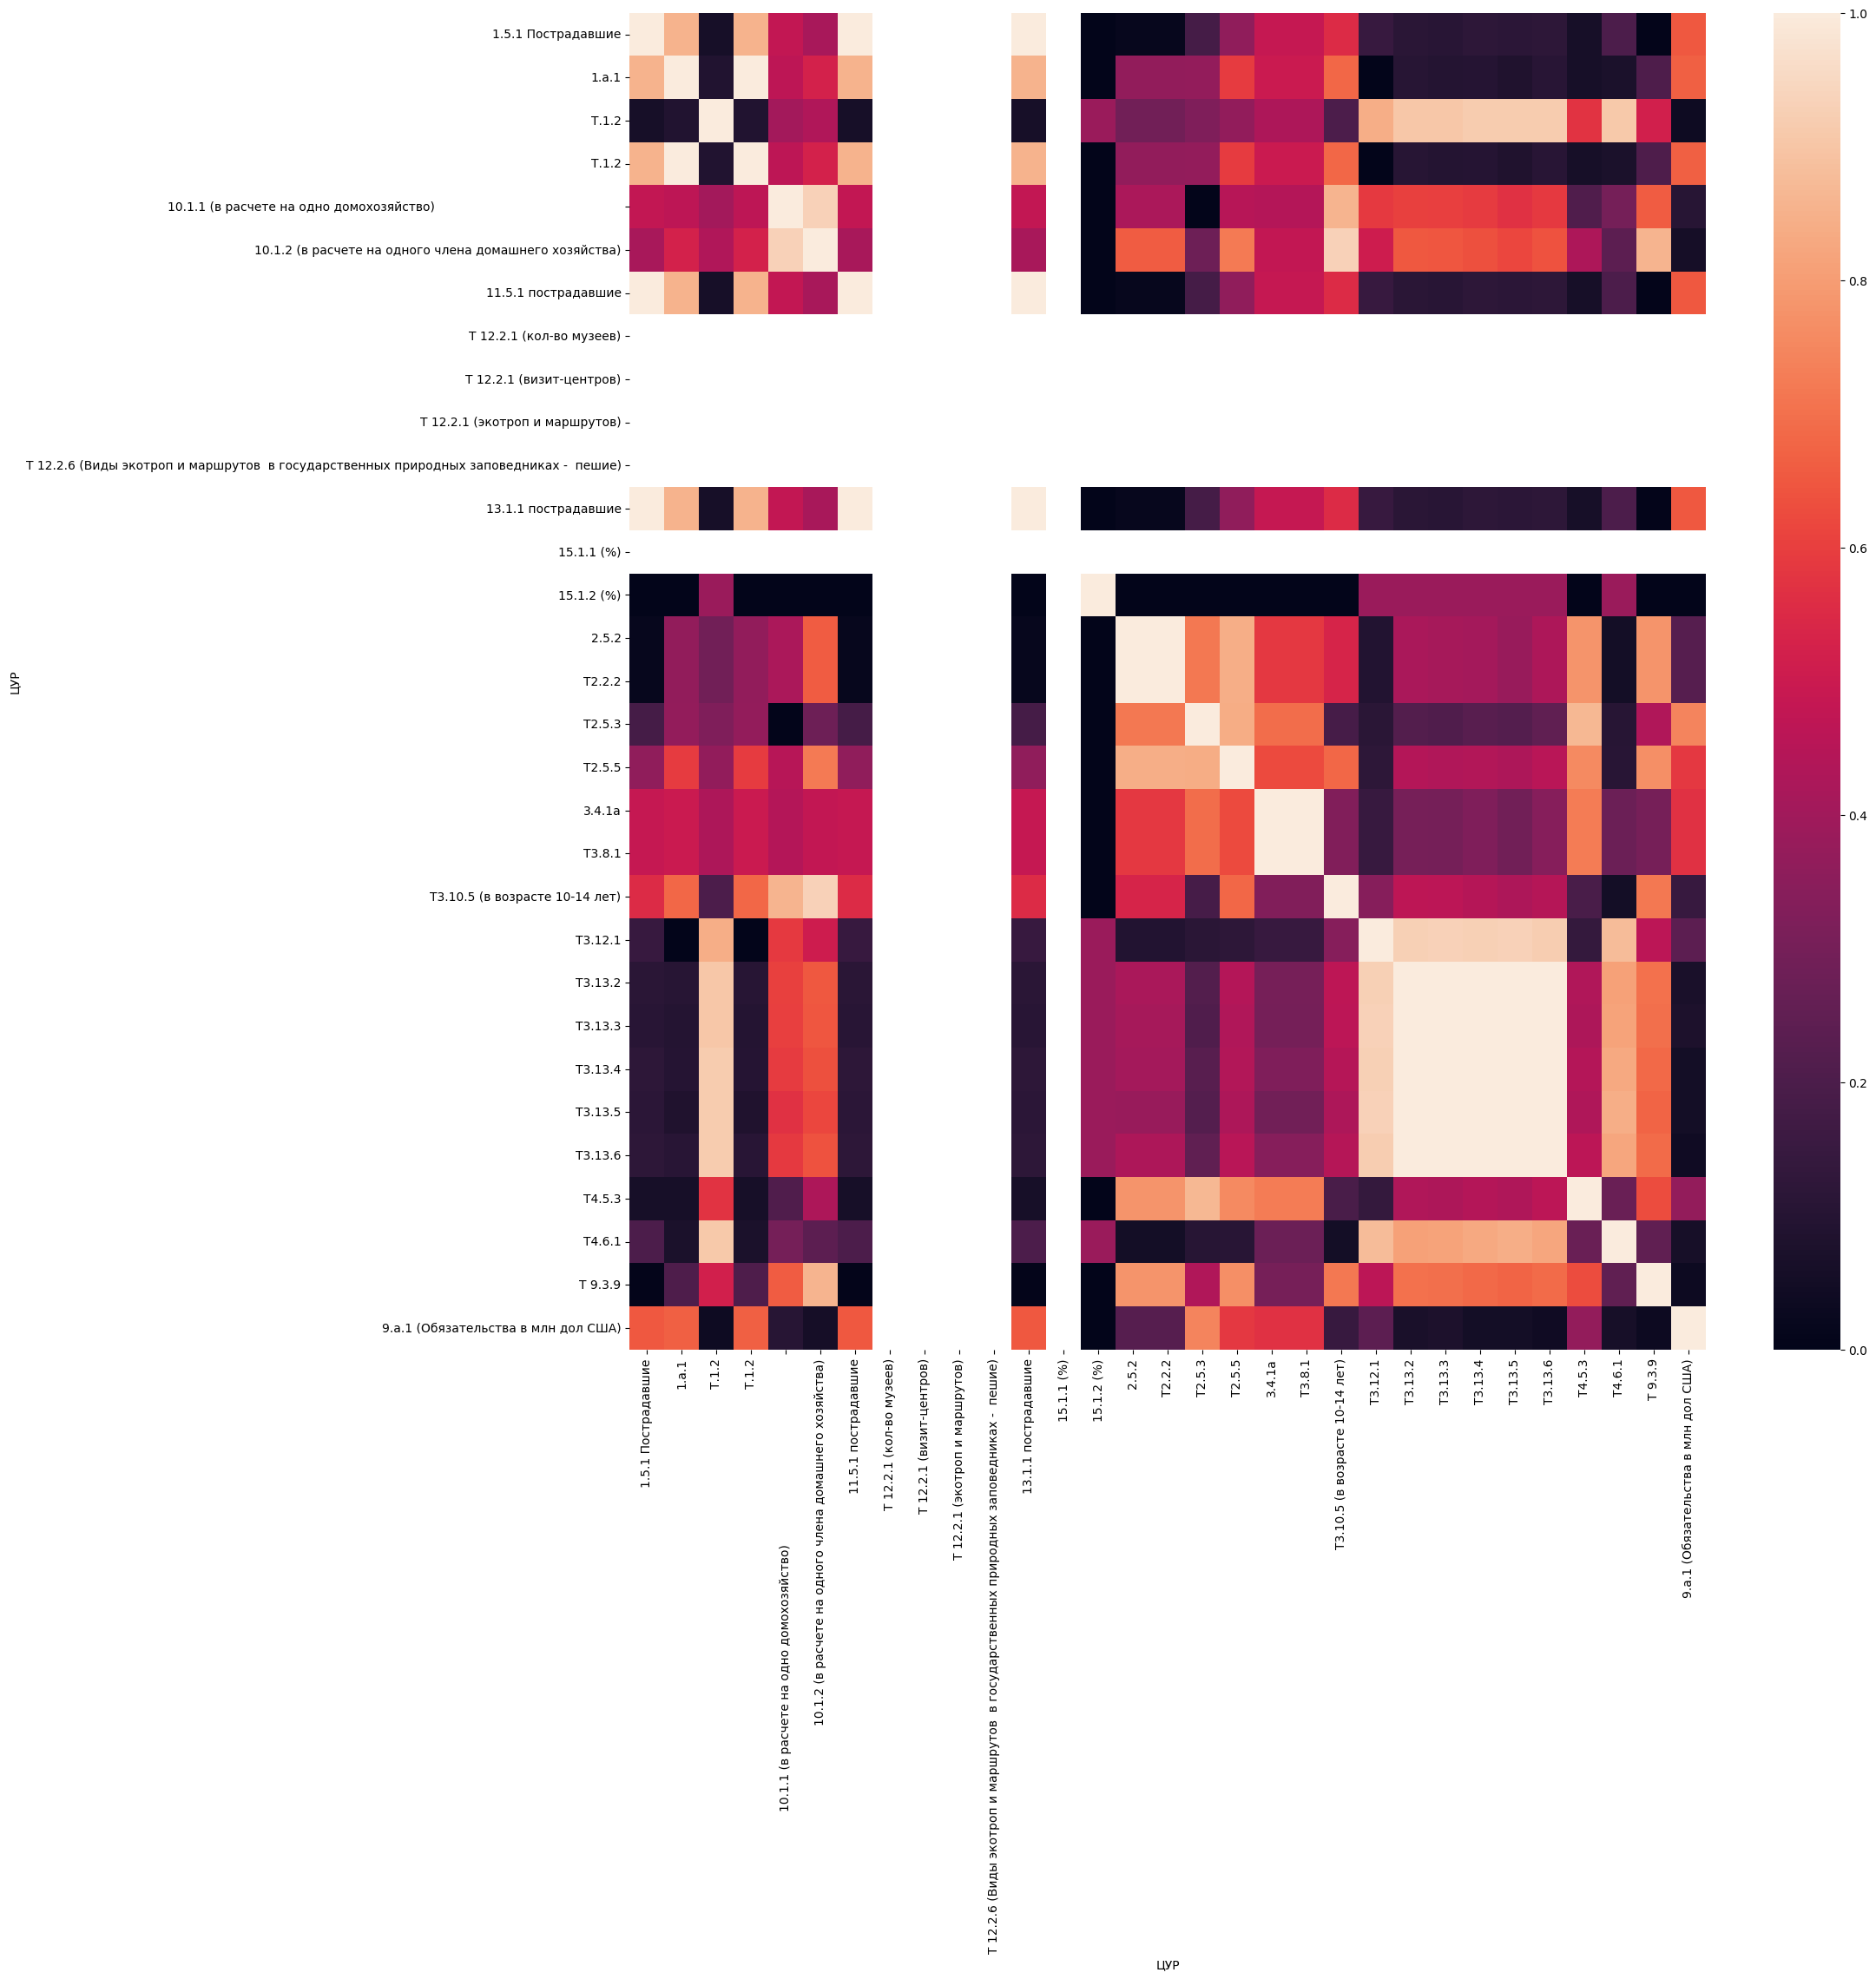

In [79]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(clusters_kmeans[2].T.corr().abs())

<Axes: xlabel='ЦУР', ylabel='ЦУР'>

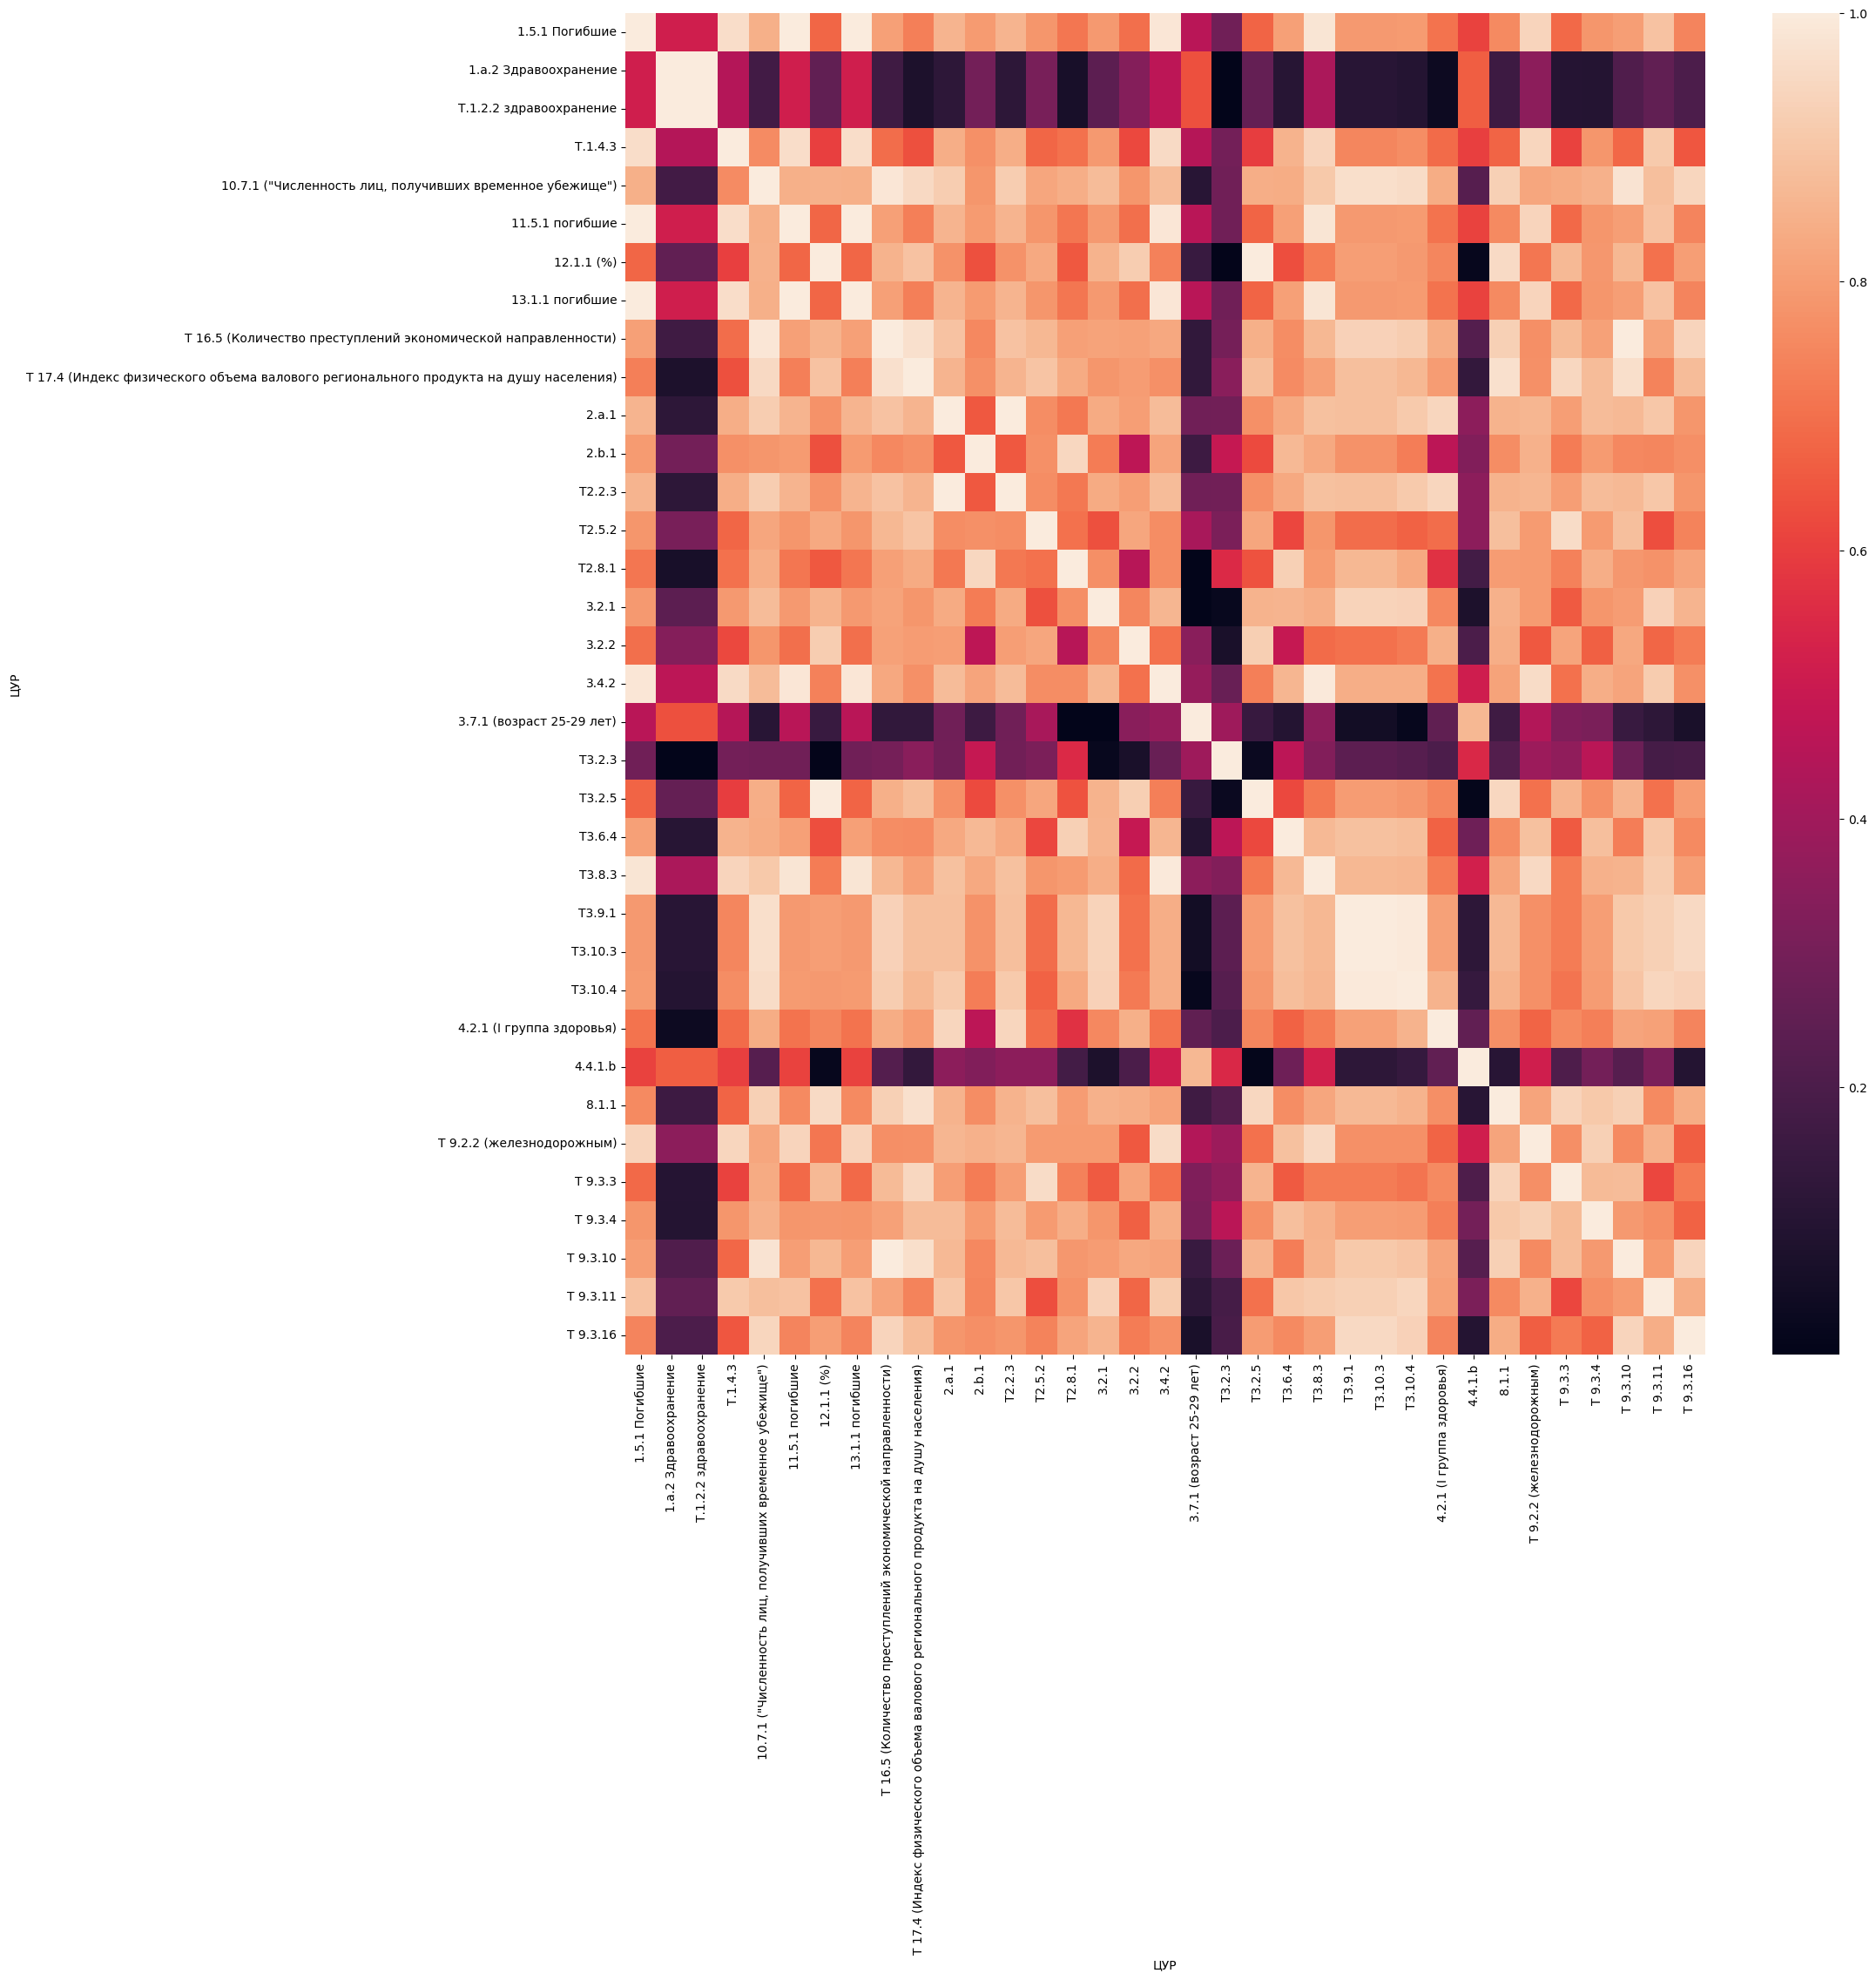

In [80]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(clusters_kmeans[3].T.corr().abs())

<Axes: xlabel='ЦУР', ylabel='ЦУР'>

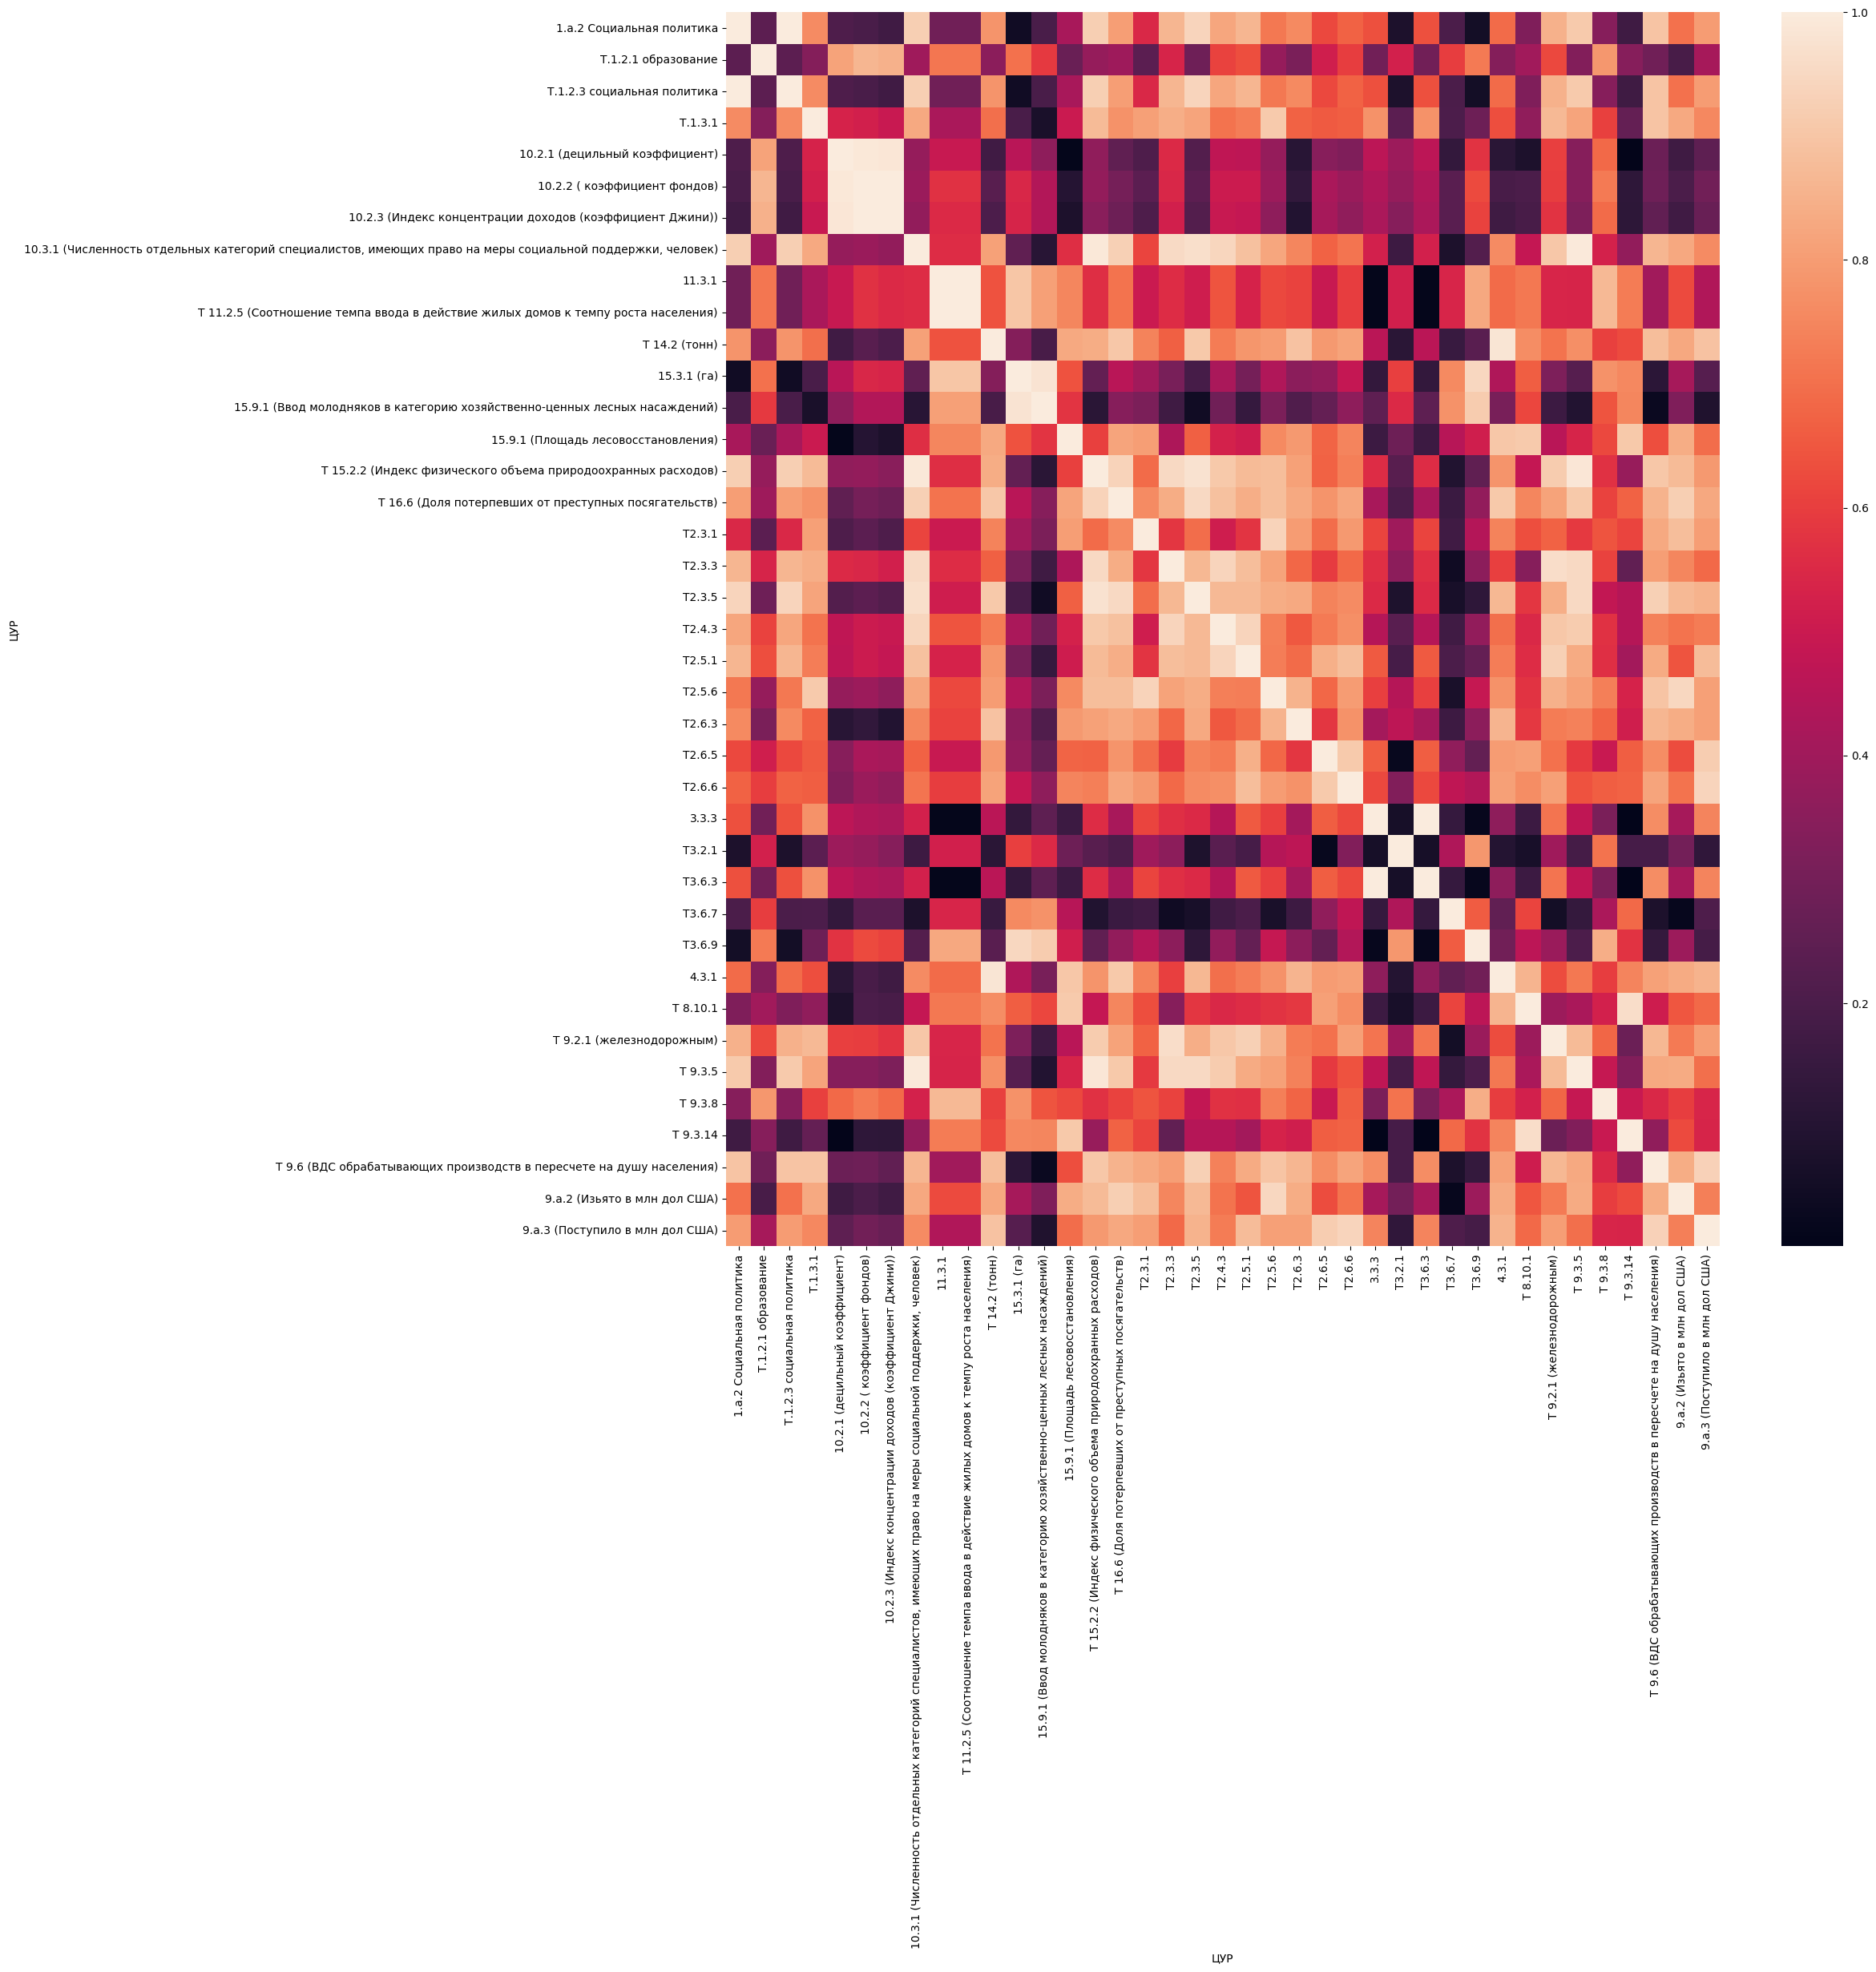

In [81]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(clusters_kmeans[4].T.corr().abs())

### Прогноз

In [56]:
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.arch import ARCH
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error

AutoARIMA самостоятельно подбирает параметры ARIMA для конкретного временного ряда, поэтому используем ее

In [57]:
arima = AutoARIMA(seasonal=False, start_p=0, start_q=0)
arch = ARCH()
exp = ExponentialSmoothing()

Смотрим какая из моделей лучше подгоняется под временной ряд по метрике MAPE и выбираем ее предикт в качестве результата

In [58]:
model_choices = []
predict_2023 = []
predict_2024 = []

for idx, row in df_ro.iterrows():
    time_series = row.values # list
    # get predictions
    arch_predict = np.squeeze(arch.fit_predict(time_series, fh=range(len(time_series)+2)))
    arima_predict = np.squeeze(arima.fit_predict(time_series, fh=range(len(time_series)+2)))
    exp_predict = np.squeeze(exp.fit_predict(time_series, fh=range(len(time_series)+2)))
    # compute metric
    arch_mape = mean_absolute_percentage_error(time_series, arch_predict[:-2])
    arima_mape = mean_absolute_percentage_error(time_series, arima_predict[:-2])
    exp_mape = mean_absolute_percentage_error(time_series, exp_predict[:-2])

    min_mape = min(arch_mape, arima_mape, exp_mape)
    if min_mape == arch_mape:
        model_choices.append("arch")
        predict_2023.append(arch_predict[-2])
        predict_2024.append(arch_predict[-1])
    elif min_mape == arima_mape:
        model_choices.append("arima")
        predict_2023.append(arima_predict[-2])
        predict_2024.append(arima_predict[-1])
    else:
        model_choices.append("exp")
        predict_2023.append(exp_predict[-2])
        predict_2024.append(exp_predict[-1])

e:\SDG\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\SDG\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
e:\SDG\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\SDG\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\SDG\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-s

In [59]:
df_ro_forecast = df_ro.copy()

In [60]:
df_ro_forecast["Model"] = model_choices
df_ro_forecast["2023_forecast"] = predict_2023
df_ro_forecast["2024_forecast"] = predict_2024

In [61]:
df_ro_forecast

2016     2017     2018  \
ЦУР                                                                             
1.2.2                                                 14.20    13.90    13.20   
1.3.1                                               2241.00  2029.00  4905.00   
1.4.1                                                 61.20    63.00    64.30   
1.4.2                                               6227.10  6233.70  6246.60   
1.5.1 Пострадавшие                                   135.00   648.00    50.00   
...                                                     ...      ...      ...   
9.а.1 (Обязательства в млн дол США)                   24.20   277.67   181.02   
9.а.2 (Изьято в млн дол США)                         215.59   476.03   396.68   
9.а.3 (Поступило в млн дол США)                      191.39   198.36   577.69   
9.b.1 (Доля продукции высокотехнологичных и нау...    19.00    20.30    19.90   
Т 9.9 (Внутренние затраты на исследования и раз...     0.99     0.91     0.84   

                                                       2019     2020  \
ЦУР                                                                    
1.2.2                                                 13.30    13.00   
1.3.1                                               8689.00  6921.00   
1.4.1                                                 67.50    66.97   
1.4.2                                               6255.60  6241.60   
1.5.1 Пострадавшие                                    61.00   281.00   
...                                                     ...      ...   
9.а.1 (Обязательства в млн дол США)                   92.19    91.64   
9.а.2 (Изьято в млн дол США)                         617.75   418.45   
9.а.3 (Поступило в млн дол США)                      525.56   510.09   
9.b.1 (Доля продукции высокотехнологичных и нау...    18.30    19.10   
Т 9.9 (Внутренние затраты на исследования и раз...     0.98     0.86   

                                                        2021      2022  Model  \
ЦУР                                                                             
1.2.2                                                  12.00     10.50   arch   
1.3.1                                               15304.00  23687.00   arch   
1.4.1                                                  68.74     73.74   arch   
1.4.2                                                6245.70   6271.70  arima   
1.5.1 Пострадавшие                                    235.00    235.00    exp   
...                                                      ...       ...    ...   
9.а.1 (Обязательства в млн дол США)                    79.31     79.31   arch   
9.а.2 (Изьято в млн дол США)                          614.30    614.30  arima   
9.а.3 (Поступило в млн дол США)                       534.99    534.99  arima   
9.b.1 (Доля продукции высокотехнологичных и нау...     18.60     18.60   arch   
Т 9.9 (Внутренние затраты на исследования и раз...      0.71      0.71   arch   

                                                    2023_forecast  \
ЦУР                                                                 
1.2.2                                                   12.972090   
1.3.1                                                 9110.857058   
1.4.1                                                   66.501947   
1.4.2                                                 6246.000000   
1.5.1 Пострадавшие                                     234.105566   
...                                                           ...   
9.а.1 (Обязательства в млн дол США)                    112.257249   
9.а.2 (Изьято в млн дол США)                           479.014286   
9.а.3 (Поступило в млн дол США)                        439.010000   
9.b.1 (Доля продукции высокотехнологичных и нау...      19.062496   
Т 9.9 (Внутренние затраты на исследования и раз...       0.862717   

                                                    2024_forecast  
ЦУР                                         

In [62]:
df_ro_forecast.to_csv("./result_data/forecast/forecats.csv")

In [63]:
df_ro_forecast[df_ro_forecast["2023_forecast"] != df_ro_forecast["2024_forecast"] ]

2016    2017    2018  \
ЦУР                                                                         
10.2.5 (Доля оплаты труда наемных работников ВРП)   38.20   38.40   38.90   
2.1.1                                                0.60    0.40    0.40   
Т2.2.1                                               0.60    0.40    0.40   
3.4.1b                                              39.80   33.30   32.20   
Т3.6.4                                               2.15    2.08    1.49   
Т3.10.1                                            489.50  448.20  444.50   
Т3.11.1                                              4.40    3.30    3.50   

                                                     2019   2020   2021  \
ЦУР                                                                       
10.2.5 (Доля оплаты труда наемных работников ВРП)   38.50   36.5   34.2   
2.1.1                                                0.30    0.1    0.1   
Т2.2.1                                               0.30    0.1    0.1   
3.4.1b                                              34.10   60.3   96.6   
Т3.6.4                                               1.07    1.0    1.3   
Т3.10.1                                            428.70  493.0  579.9   
Т3.11.1                                              3.70    4.1    5.1   

                                                    2022  Model  \
ЦУР                                                               
10.2.5 (Доля оплаты труда наемных работников ВРП)   34.2  arima   
2.1.1                                                0.0  arima   
Т2.2.1                                               0.0  arima   
3.4.1b                                              83.5  arima   
Т3.6.4                                               1.7  arima   
Т3.10.1                                            579.9  arima   
Т3.11.1                                              5.1  arima   

                                                   2023_forecast  \
ЦУР                                                                
10.2.5 (Доля оплаты труда наемных работников ВРП)   3.560006e+01   
2.1.1                                               9.526792e-18   
Т2.2.1                                              9.526792e-18   
3.4.1b                                              6.067725e+01   
Т3.6.4                                              1.754725e+00   
Т3.10.1                                             5.248170e+02   
Т3.11.1                                             4.362643e+00   

                                                   2024_forecast  
ЦУР                                                               
10.2.5 (Доля оплаты труда наемных работников ВРП)   3.819482e+01  
2.1.1                                               9.028334e-18  
Т2.2.1                                              9.028334e-18  
3.4.1b                                              4.620151e+01  
Т3.6.4                                              1.898848e+00  
Т3.10.1                                             4.907172e+02  
Т3.11.1                                             4.111116e+00

In [88]:
df_ro_forecast["Model"].value_counts()

Model
arch     167
exp       58
arima     37
Name: count, dtype: int64

Модель ARCH показала себя значительно лучше экспоненциального сглаживания и ARIMA на наших данных